<center><h2>Project : Employee Retention</h2></center><br></h3></center>


             


<img src="https://projects.insaid.co/capstone2/hr.png" align='center' width="700" height="100"><br/>






# Guidelines for Preparing Project Report
  1.	Jupyter Notebook that contains your analysis and model building should be submitted as Project Report.
  2.	Order of Contents in the Jupyter Notebook
            a.	Problem Statement
            b.	Dataset Description
            c.	Examine the Data
            d.	Description of what challenges are present in the Data
            e.	Resolve the challenges simultaneously describing how are you resolving the challenges
            f.	EDA and Inferences
            g.	Feature Engineering 
            h.	Build models
            i.	Declare hyper-parameters to tune the models.
            j.	Fit and tune models with cross-validation
            k.	Evaluate models and finalize the model
  3.	The Jupyter Notebook should have Table of Contents.
  4.	Each and every code block should be accompanied by a detailed description of what actually you are doing in the code    block. In case of EDA, inferences should be mentioned.
  5.	Bold important words/phrases in the Descriptions.
  6.	The Flow and Explanation should be such that it is easy to read and understand the entire Project and its implementation.




---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Dataset Description & Examine the Data**](#Section4)<br>
**5.** [**Challenges present & Resolve**](#Section4)<br>
**6.** [**Exploratory Data Analysis & Feature Engineering & Interface**](#Section5)<br>
**7.** [**Build models: Model Development & hyper-parameters & Evaluation**](#Section6)<br>
**8.** [**Predicting the unkown**](#Section7)<br>


---
<a name = Section1></a>
# **1. Introduction**

- Your client for this project is the HR Department at a software company.

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.
#### Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

- This suffers from the following problems:

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The **HR department** has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

---

<a name = Section2></a>
# **2. Problem Statement**

**Employee attrition** is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, we are tasked to predict the attrition of employees of an organization.

Your client is the HR Department at a software company.

a. They want to try a new initiative to retain employees.<br>
b. The idea is to use data to predict whether an employee is likely to leave.<br>

Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**

In [322]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
print('done')

done


In [3]:
!pip install mysqlclient

In [4]:
!pip install mysql-connector-python

In [5]:
import mysql.connector

In [7]:
from subprocess import check_output

# MYSQL Database 
import mysql.connector
from mysql.connector import Error
from collections import Counter

# ML Lib.
import pandas as pd
import numpy as np

# import the required Lib. from sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings 
warnings.filterwarnings('ignore')

from IPython.display import Markdown as md

---
<a name = Section4></a>
# 4. Data Information & Description


### Description of the Dataset

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. # department_data
This dataset contains information about each department. The schema of the dataset is as follows:

- dept_id – Unique Department Code 
- dept_name – Name of the Department 
- dept_head – Name of the Head of the Department

2. # employee_details_data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id – Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

3. # employee_data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

Target variable

- status – Current employment status (Employed / Left)
- Administrative information

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee

Workload information

- n_projects – Number of projects employee has worked on
- avg_monthly_hrs – Average number of hours worked per month
- Mutual evaluation information

- satisfaction – Score for employee’s satisfaction with the - company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
- filed_complaint – Has the employee filed a formal complaint in the last 3 years?

- ```info``` function gives us the following insights into 
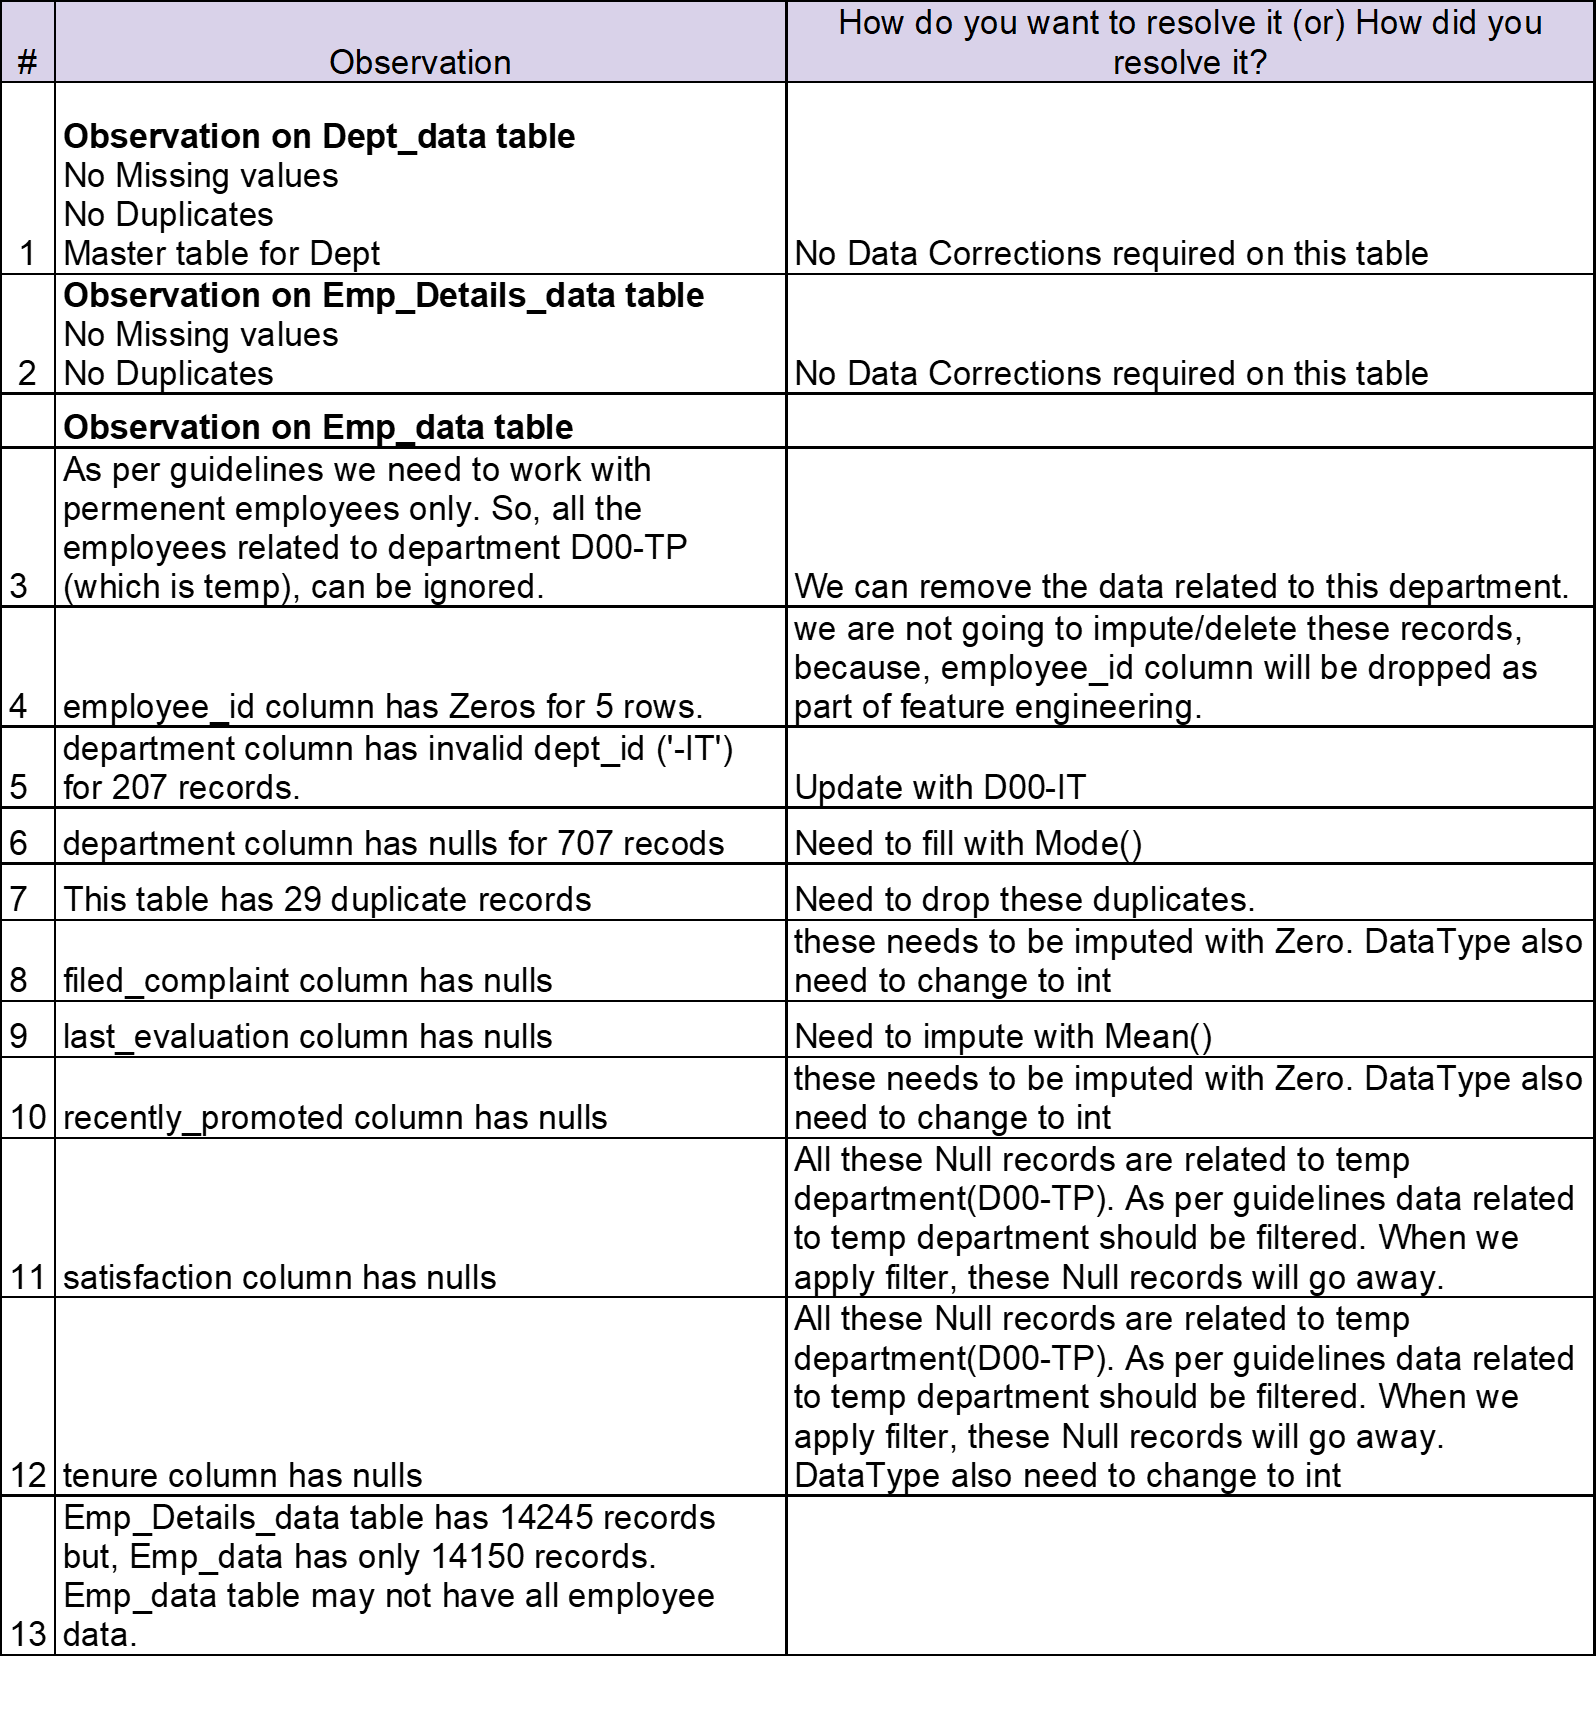

---
<a name = Section5></a>
# 5. Exploratory Data Analysis and Data Preparation 

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>


#### Fetch Data from MySQL Database Insaid has provided

Download the DataSets onto Python by connecting to the below provided MySQL instance.
                      
    host        'cpanel.insaid.co'
    user 	   'student'
    passwd      'student'
    database    'Capstone2'
Use "mysql.connector" package in Python.

In [9]:
tables_list = ['department_data', 'employee_details_data', 'employee_data']

In [12]:
try:
    mySQLconnection = mysql.connector.connect(host='cpanel.insaid.co',
                             database='Capstone2',
                             user='student',
                             password='student')
    
    if mySQLconnection.is_connected():
        db_Info = mySQLconnection.get_server_info()
        print("Connected to db... MySQL Server version on ",db_Info)
        cursor = mySQLconnection.cursor()
        cursor.execute("select database();")
        database = cursor.fetchone()
        print ("Connected to - ", database)
        
        sql_select_Query = "select * from department_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_dept_data = pd.DataFrame(SQL_Query)
        print(df_dept_data.head(3))
        
        sql_select_Query = "select * from employee_details_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_emp_data = pd.DataFrame(SQL_Query)
        print(df_emp_data.head(3))

        sql_select_Query = "select * from employee_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_emp_detail_Data = pd.DataFrame(SQL_Query)
        print(df_emp_detail_Data.head(3))
except Error as e :
    print ("Error while connecting to MySQL", e)
finally:
    #closing database connection.
    if(mySQLconnection .is_connected()):
        mySQLconnection.close()
        print("MySQL connection is closed")

Connected to db... MySQL Server version on  8.0.29
Connected to -  ('Capstone2',)
  dept_id dept_name        dept_head
0  D00-IT        IT       Henry Adey
1  D00-SS     Sales  Edward J Bayley
2  D00-TP      Temp  Micheal Zachrey
   employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
   avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.405101   Left     3.0     

In [13]:
df_dept_data.to_csv('dept_data.csv')
df_emp_data.to_csv('emp_det_data.csv')
df_emp_detail_Data.to_csv('employee_data.csv')
print (df_dept_data.shape)
print (df_emp_data.shape)
print (df_emp_detail_Data.shape)

(11, 3)
(14245, 4)
(14150, 11)


In [14]:
df_dept_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [15]:
df_emp_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [16]:
df_emp_detail_Data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [17]:
df_dept_data['dept_id'].isnull().sum() 

0

In [20]:
df_dept_data['dept_id'].describe()

count         11
unique        11
top       D00-IT
freq           1
Name: dept_id, dtype: object

In [18]:
df_emp_data['employee_id'].isnull().sum() 

0

In [22]:
df_emp_data['employee_id'].describe()

count     14245.000000
mean     112123.050544
std        8500.457343
min      100101.000000
25%      105775.000000
50%      111298.000000
75%      116658.000000
max      148988.000000
Name: employee_id, dtype: float64

In [19]:
df_emp_detail_Data['employee_id'].isnull().sum() 

0

In [23]:
df_emp_detail_Data['employee_id'].describe()

count     14150.000000
mean     112080.750247
std        8748.202856
min           0.000000
25%      105772.500000
50%      111291.500000
75%      116650.750000
max      148988.000000
Name: employee_id, dtype: float64

- min value is 0 for some emp. id , that means records are not correct amd we need to get rid of this data

In [24]:
# Find out data with emp id 0
df_emp_detail_Data[df_emp_detail_Data['employee_id']<=0].count()

avg_monthly_hrs      5
department           4
filed_complaint      0
last_evaluation      5
n_projects           5
recently_promoted    0
salary               5
satisfaction         5
status               5
tenure               5
employee_id          5
dtype: int64

In [25]:
df_emp_detail_Data[df_emp_detail_Data['employee_id']<=0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,NaN,0.852702,6,NaN,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,NaN,0.774554,6,NaN,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,NaN,0.402660,2,NaN,medium,0.437359,Left,3.0,0
11304,167.0,None,NaN,0.880053,5,NaN,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,NaN,0.505883,5,NaN,low,0.631046,Employed,4.0,0


In [26]:
# Get Rid of this junk data in df_emp_detail_Data Datafrme
df_emp_detail_Data.drop(df_emp_detail_Data[df_emp_detail_Data['employee_id']<=0].index,inplace=True)


In [27]:
df_emp_detail_Data[df_emp_detail_Data['employee_id']<=0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id


In [28]:
df_emp_detail_Data.shape

(14145, 11)

In [30]:
df_emp_detail_Data.groupby(['department']).size()

department
-IT         207
D00-AD      175
D00-ENG    2573
D00-FN      725
D00-IT     1157
D00-MN      593
D00-MT      815
D00-PD      855
D00-PR      173
D00-SP     2112
D00-SS     3904
D00-TP      150
dtype: int64

Replace -IT with Correct IT department id

In [31]:
df_emp_detail_Data['department'].replace({'-IT': 'D00-IT'}, inplace=True)

In [32]:
df_emp_detail_Data.groupby(['department']).size()

department
D00-AD      175
D00-ENG    2573
D00-FN      725
D00-IT     1364
D00-MN      593
D00-MT      815
D00-PD      855
D00-PR      173
D00-SP     2112
D00-SS     3904
D00-TP      150
dtype: int64

In [29]:
df_emp_detail_Data['avg_monthly_hrs'].describe()

count    14145.000000
mean       199.987063
std         50.828241
min         49.000000
25%        155.000000
50%        199.000000
75%        245.000000
max        310.000000
Name: avg_monthly_hrs, dtype: float64

    -Minimum monthly hours : 49 
    -Max. monthly hours    : 310 
    -Average monthly hours : 200 

We are going to perform a merge on the dataframes, on the basis of Employee_id and dept_id column to create a new dataframe df_merge, in order to make our EDA easier.

In [33]:
df_emp_detail_Data.shape

(14145, 11)

In [35]:
df_emp_data.shape

(14245, 4)

In [36]:
df_empData_merge= pd.merge(df_emp_detail_Data, df_emp_data, how='left', on="employee_id")

In [37]:
df_empData_merge.head()


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42,Female,Married
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150,24,Female,Unmarried
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346,51,Female,Married
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707,23,Female,Unmarried


In [38]:
df_empData_merge.shape

(14145, 14)

In [49]:
df = df.drop('department', 1)

In [39]:
df = pd.merge(df_empData_merge, df_dept_data, how='left', left_on='department', right_on='dept_id')

In [50]:
df.shape  # #14145 17

(14145, 16)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   filed_complaint    2046 non-null   float64
 2   last_evaluation    12658 non-null  float64
 3   n_projects         14145 non-null  int64  
 4   recently_promoted  297 non-null    float64
 5   salary             14145 non-null  object 
 6   satisfaction       13995 non-null  float64
 7   status             14145 non-null  object 
 8   tenure             13995 non-null  float64
 9   employee_id        14145 non-null  int64  
 10  age                14145 non-null  int64  
 11  gender             14145 non-null  object 
 12  marital_status     14145 non-null  object 
 13  dept_id            13439 non-null  object 
 14  dept_name          13439 non-null  object 
 15  dept_head          13439 non-null  object 
dtypes: float64(6), int64(3

In [52]:
df['filed_complaint'].unique()

array([nan,  1.])

In [53]:
df.head(2)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,246.0,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467,42,Female,Married,NaN,NaN,NaN
1,134.0,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210,23,Female,Unmarried,NaN,NaN,NaN


   

#     - Data pre-processing and cleaning

In [54]:
df.isnull().sum()

avg_monthly_hrs          0
filed_complaint      12099
last_evaluation       1487
n_projects               0
recently_promoted    13848
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
age                      0
gender                   0
marital_status           0
dept_id                706
dept_name              706
dept_head              706
dtype: int64

In [55]:
df.isnull().sum()[df.isnull().sum() !=0]

filed_complaint      12099
last_evaluation       1487
recently_promoted    13848
satisfaction           150
tenure                 150
dept_id                706
dept_name              706
dept_head              706
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   filed_complaint    2046 non-null   float64
 2   last_evaluation    12658 non-null  float64
 3   n_projects         14145 non-null  int64  
 4   recently_promoted  297 non-null    float64
 5   salary             14145 non-null  object 
 6   satisfaction       13995 non-null  float64
 7   status             14145 non-null  object 
 8   tenure             13995 non-null  float64
 9   employee_id        14145 non-null  int64  
 10  age                14145 non-null  int64  
 11  gender             14145 non-null  object 
 12  marital_status     14145 non-null  object 
 13  dept_id            13439 non-null  object 
 14  dept_name          13439 non-null  object 
 15  dept_head          13439 non-null  object 
dtypes: float64(6), int64(3

In [57]:
df.describe(include='all')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
count,14145.000000,2046.0,12658.000000,14145.000000,297.0,14145,13995.000000,14145,13995.000000,14145.000000,14145.000000,14145,14145,13439,13439,13439
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,2,2,11,11,11
top,NaN,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN,NaN,Male,Unmarried,D00-SS,Sales,Edward J Bayley
freq,NaN,NaN,NaN,NaN,NaN,6902,NaN,10782,NaN,NaN,NaN,9304,7226,3904,3904,3904
mean,199.987063,1.0,0.718413,3.777943,1.0,NaN,0.621296,NaN,3.499321,112120.368752,32.898621,NaN,NaN,NaN,NaN,NaN
std,50.828241,0.0,0.173099,1.249930,0.0,NaN,0.250441,NaN,1.462815,8492.099388,9.978939,NaN,NaN,NaN,NaN,NaN
min,49.000000,1.0,0.316175,1.000000,1.0,NaN,0.040058,NaN,2.000000,100101.000000,22.000000,NaN,NaN,NaN,NaN,NaN
25%,155.000000,1.0,0.563772,3.000000,1.0,NaN,0.450388,NaN,3.000000,105780.000000,24.000000,NaN,NaN,NaN,NaN,NaN
50%,199.000000,1.0,0.724638,4.000000,1.0,NaN,0.652453,NaN,3.000000,111296.000000,29.000000,NaN,NaN,NaN,NaN,NaN
75%,245.000000,1.0,0.871410,5.000000,1.0,NaN,0.824957,NaN,4.000000,116653.000000,41.000000,NaN,NaN,NaN,NaN,NaN


In [58]:
df.shape

(14145, 16)

<AxesSubplot:xlabel='missing_count_percentage', ylabel='features'>

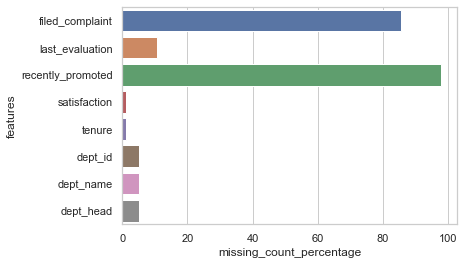

In [60]:
missing_data = df.isnull().sum()[df.isnull().sum() !=0]
missing_data = pd.DataFrame(missing_data.reset_index())
missing_data.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing_data['missing_count_percentage'] = ((missing['missing_count'])/df.shape[0])*100
plt.figure()
sns.barplot(y = missing_data['features'], x = missing_data['missing_count_percentage'])

In [61]:
# filed_complaint has to change its values frm Nan to '0' as it is important feature in deciding predictions
df['filed_complaint'] = df['filed_complaint'].replace(np.nan, 0)

In [62]:
# recently_promoted has to change its values frm Nan to '0' as it is important feature in deciding predictions
df['recently_promoted'] = df['recently_promoted'].replace(np.nan, 0)

In [63]:
df['recently_promoted'].unique()

array([0., 1.])

In [64]:
df.isnull().sum()

avg_monthly_hrs         0
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
age                     0
gender                  0
marital_status          0
dept_id               706
dept_name             706
dept_head             706
dtype: int64

In [65]:
df.loc[df.dept_id == 'D00-SS', ['dept_name']] = 'Sales' 

In [66]:
df.loc[df.dept_id == 'D00-SS', ['dept_head']] ='Edward J Bayley'

In [67]:
df.isnull().sum()

avg_monthly_hrs         0
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
age                     0
gender                  0
marital_status          0
dept_id               706
dept_name             706
dept_head             706
dtype: int64

In [68]:
# Drop records with missing data for dept id, dept name, dept head
df.dropna(subset=['dept_id', 'dept_name', 'dept_head'], inplace = True)

In [69]:
df.isnull().sum()

avg_monthly_hrs         0
filed_complaint         0
last_evaluation      1421
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
age                     0
gender                  0
marital_status          0
dept_id                 0
dept_name               0
dept_head               0
dtype: int64

In [266]:
# tenure has null values but some values are high so mean would not be good idea - using Median for tenure to replace missing values 
df['tenure'].fillna(df['tenure'].median(),inplace=True)

<AxesSubplot:xlabel='tenure'>

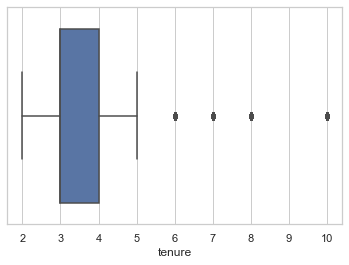

In [267]:
plt.plot(figsize=(15,10))
sns.boxplot(df['tenure'])

<AxesSubplot:xlabel='last_evaluation'>

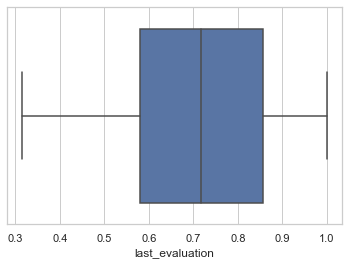

In [268]:
plt.plot(figsize=(15,10))
sns.boxplot(df['last_evaluation'])

In [269]:
 #last_evaluation has no outliers - Mean should do the job here
df['last_evaluation'] = df['last_evaluation'].fillna(df.groupby('tenure')['last_evaluation'].transform('mean'))

<AxesSubplot:xlabel='last_evaluation'>

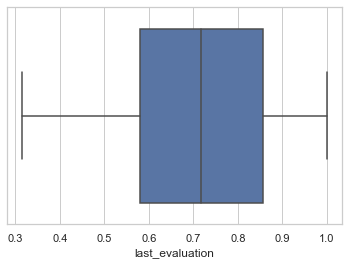

In [270]:
plt.plot(figsize=(15,10))
sns.boxplot(df['last_evaluation'])

In [71]:
df.isnull().sum()

avg_monthly_hrs        0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure               150
employee_id            0
age                    0
gender                 0
marital_status         0
dept_id                0
dept_name              0
dept_head              0
dtype: int64

In [72]:
# satisfaction has missing vaalues , values are in good range so Mean should work
df['satisfaction'].fillna(df['satisfaction'].mean(),inplace=True)

<AxesSubplot:xlabel='satisfaction'>

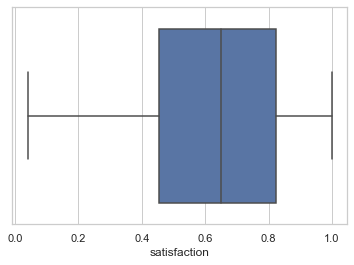

In [265]:
plt.plot(figsize=(15,10))
sns.boxplot(df['satisfaction'])

In [271]:
# Not ,uch diff. ok to take average/mean//etc tried this was also but no diff. in model outcome so change back tp normal 
#df['last_evaluation'] = df['last_evaluation'].fillna(df.groupby('tenure')['last_evaluation'].transform('mean'))
#df['satisfaction'] = df['satisfaction'].fillna(df.groupby('status')['satisfaction'].transform('mean'))
#df['satisfaction'] = df['satisfaction'].fillna(df.groupby('status')['satisfaction'].transform('mean'))

<AxesSubplot:xlabel='tenure'>

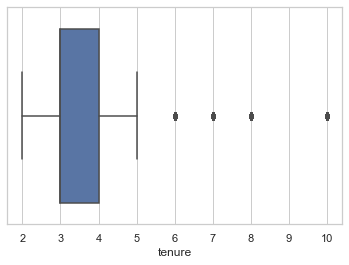

In [278]:
plt.plot(figsize=(15,10))
sns.boxplot(df['tenure'])

In [73]:
# tenure has huge data so mean would not give good data , so picked  Median 
df['tenure'].fillna(df['tenure'].median(),inplace=True)

In [74]:
df.isnull().sum()

avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [75]:
# Check for duplicates
df[df.duplicated()].count()

avg_monthly_hrs      29
filed_complaint      29
last_evaluation      29
n_projects           29
recently_promoted    29
salary               29
satisfaction         29
status               29
tenure               29
employee_id          29
age                  29
gender               29
marital_status       29
dept_id              29
dept_name            29
dept_head            29
dtype: int64

In [76]:
# Drop Duplicates
df.drop_duplicates(inplace = True,keep='first')

In [77]:
df.shape

(13410, 16)

# Data Summary

1. Employee data have incorrect department values "-IT", update it based on department value D00-IT 	
       										
2. Missing values:
        recently_promoted    97.90 %  Drop it 
        filed_complaint      85.54%   Drop it
        last_evaluation      10.51%   Use mean to replace
        department            5.00%   Delete records as very few records 
        tenure                1.06%   Use median as we have high range of values 
        satisfaction          1.06%"  Use mean to replace			
       				
 3. Perform Merge to comiple data , delete records with cmployee id =0 as invalid data 	
									
 5. Delete 29 duploicate records
					
 6. After Merge , final data set
        a. avg monthly hrs   
        b. department (replace dept id with the dept name)     
        c. last evaluation    
        d. no of projects        
        e. salary            
        f. satisfaction       
        g. status (target variable)
        h. tenure
        i. age               
        j. gender            
        k. marital status 

  7. Following are the categorical features :
        department, salary, status, gender, marital_status	
        a. Use label encoding to change the following categorical features to a numerical format:
            salary (low-1, medium-2, high-0). Here , salary is an ordinal feature
            status (left-1, employed-0)
            gender (male-1, female-0)
            marital status(married-0,unmarried-1)
        b. Apply get_dummies on the department feature and get the employee updated dataset with 20 features."	
									
   8. Following are the numerical features:
        average monthly hrs, last evaluation,no of projects , tenure, age
        a. Apply scaling process to the following features to bring them to the same range:
            average monthly hrs, no of projects, tenure and age"	

In [79]:
CATEGORICAL_COLUMNS = ["gender", "marital_status", "salary", "status"]

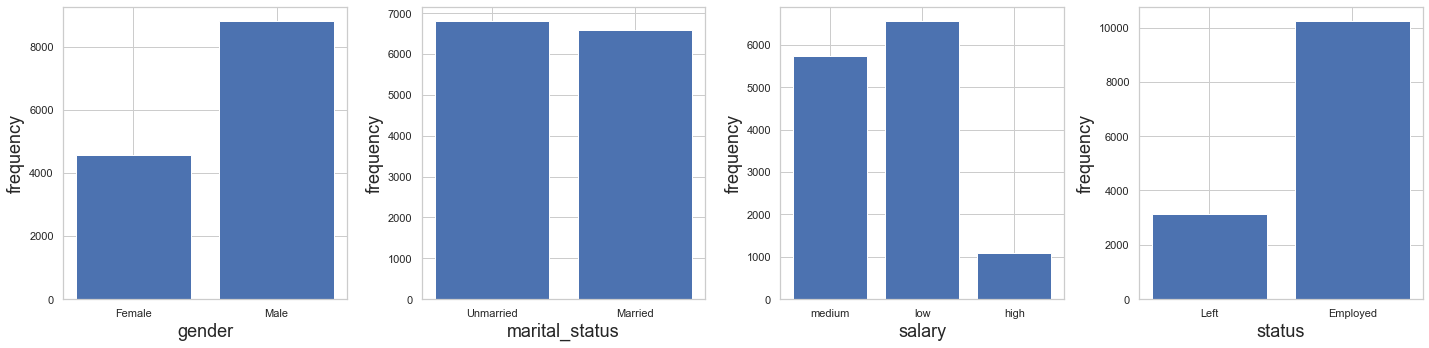

In [80]:
def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(df[CATEGORICAL_COLUMNS])

In [81]:
CONTINUOUS_COLUMNS = ["age", "avg_monthly_hrs", "last_evaluation", "n_projects", "satisfaction", "tenure"]

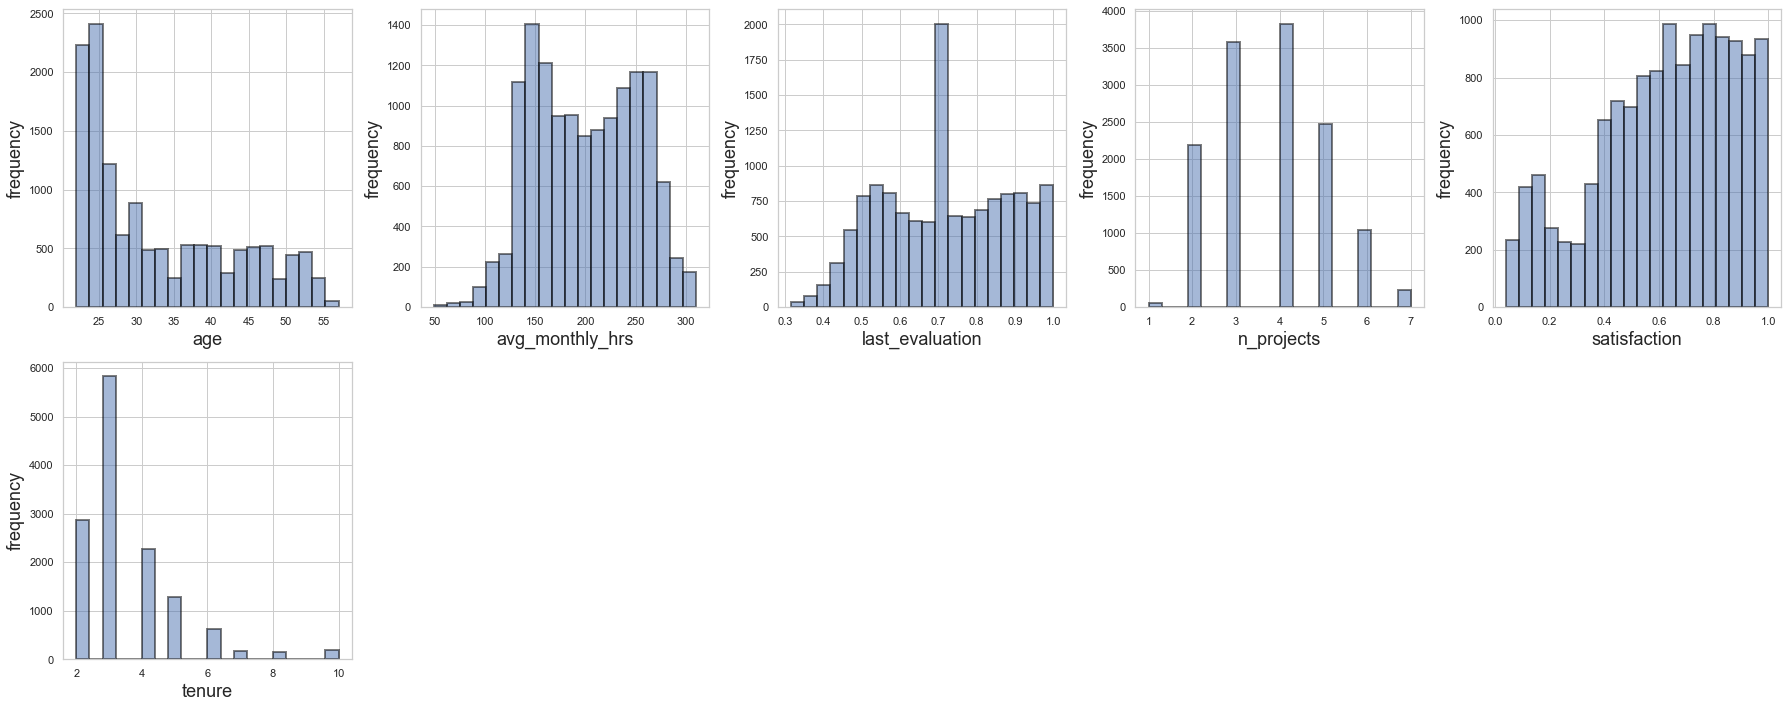

In [82]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(df[CONTINUOUS_COLUMNS])

<AxesSubplot:xlabel='status', ylabel='count'>

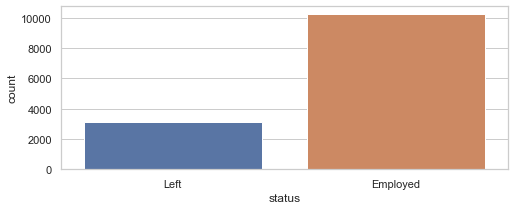

In [84]:
axis1 = plt.subplots(1,1,figsize=(8,3))
sns.countplot(x='status',data=df)

Employed    10260
Left         3150
Name: status, dtype: int64


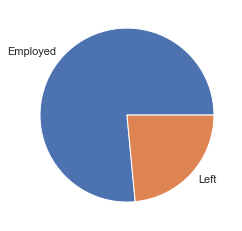

In [85]:
# Getting the count of people
leftcounts=df['status'].value_counts()
print(leftcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(leftcounts,labels=['Employed','Left']);

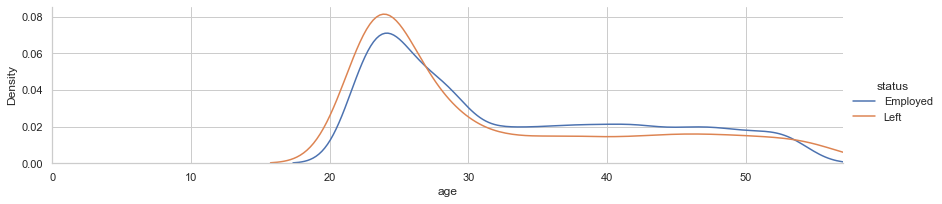

In [86]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'age')
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()

<AxesSubplot:xlabel='age', ylabel='Density'>

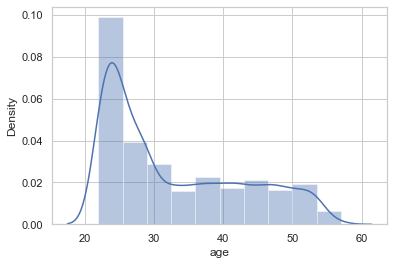

In [87]:
sns.distplot(df["age"],bins=10,kde=True)

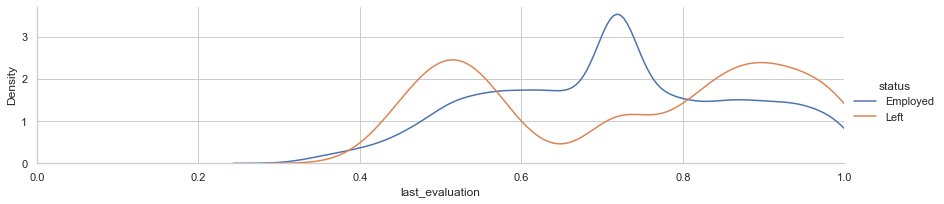

In [88]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'last_evaluation')
facet.set(xlim=(0, df['last_evaluation'].max()))
facet.add_legend()

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

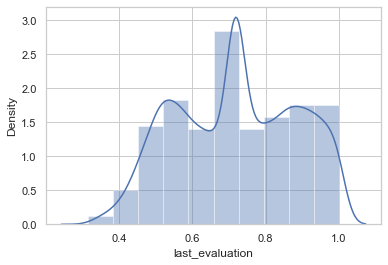

In [89]:
sns.distplot(df["last_evaluation"],bins=10,kde=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

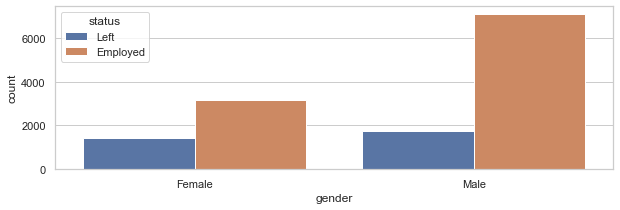

In [91]:
fig, axis1 = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='gender', hue="status", data=df, ax=axis1)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

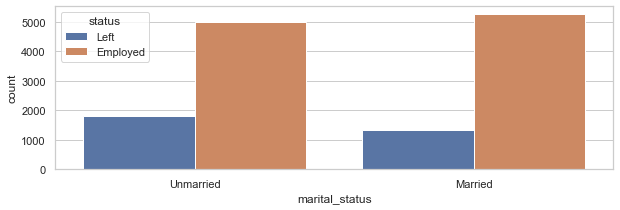

In [92]:
fig, axis1 = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='marital_status', hue="status", data=df, ax=axis1)

<AxesSubplot:xlabel='salary', ylabel='count'>

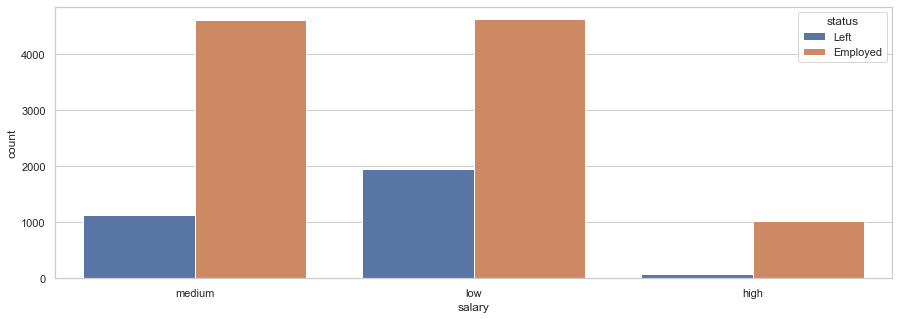

In [93]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='salary', hue="status", data=df, ax=axis1)

<AxesSubplot:xlabel='tenure', ylabel='count'>

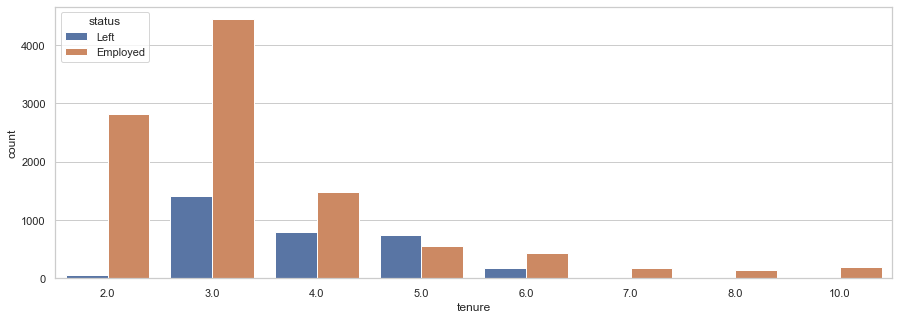

In [94]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='tenure', hue="status", data=df, ax=axis1)

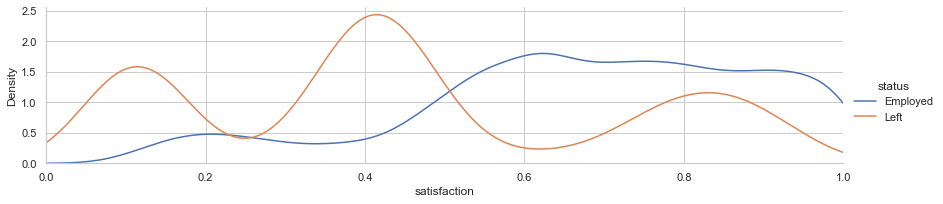

In [95]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'satisfaction')
facet.set(xlim=(0, df['satisfaction'].max()))
facet.add_legend()

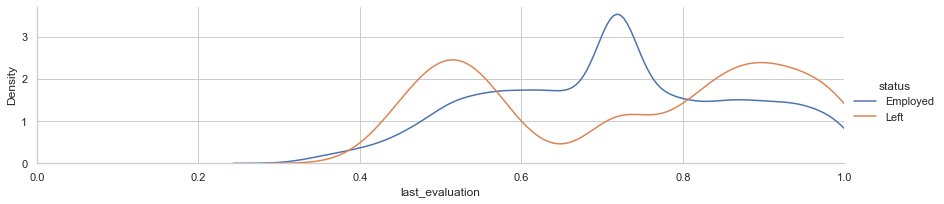

In [96]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'last_evaluation')
facet.set(xlim=(0, df['last_evaluation'].max()))
facet.add_legend()

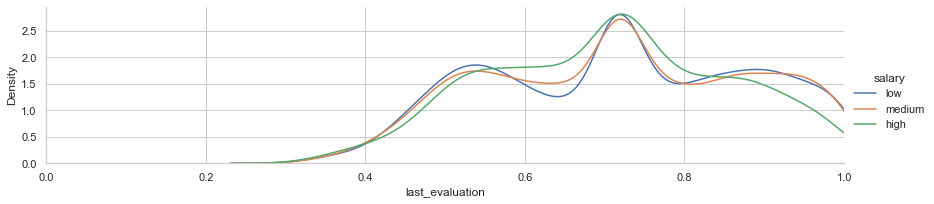

In [97]:
facet = sns.FacetGrid(df, hue="salary",aspect=4, hue_order=['low', 'medium', 'high'])
facet.map(sns.kdeplot,'last_evaluation')
facet.set(xlim=(0, df['last_evaluation'].max()))
facet.add_legend()

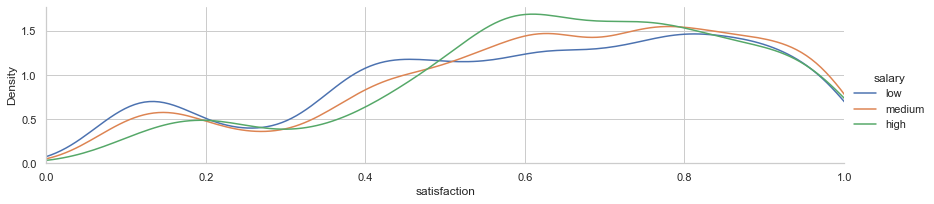

In [98]:
facet = sns.FacetGrid(df, hue="salary",aspect=4, hue_order=['low', 'medium', 'high'])
facet.map(sns.kdeplot,'satisfaction')
facet.set(xlim=(0, df['satisfaction'].max()))
facet.add_legend()

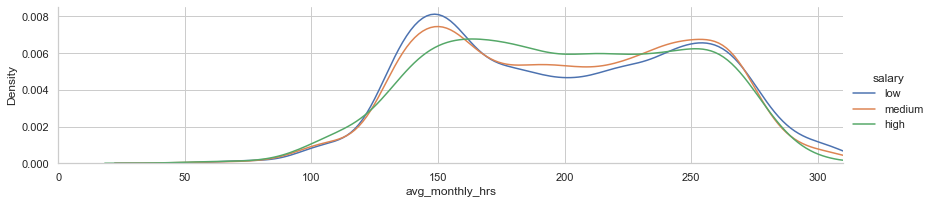

In [99]:
facet = sns.FacetGrid(df, hue="salary",aspect=4, hue_order=['low', 'medium', 'high'])
facet.map(sns.kdeplot,'avg_monthly_hrs')
facet.set(xlim=(0, df['avg_monthly_hrs'].max()))
facet.add_legend()

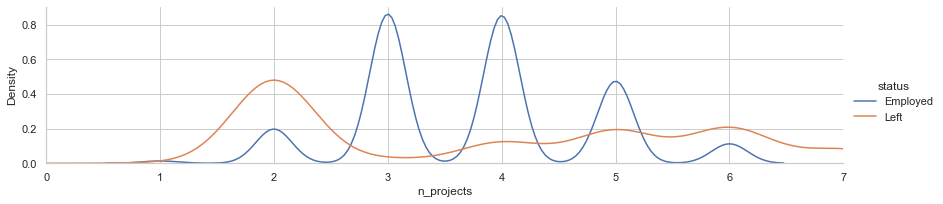

In [100]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'n_projects')
facet.set(xlim=(0, df['n_projects'].max()))
facet.add_legend()

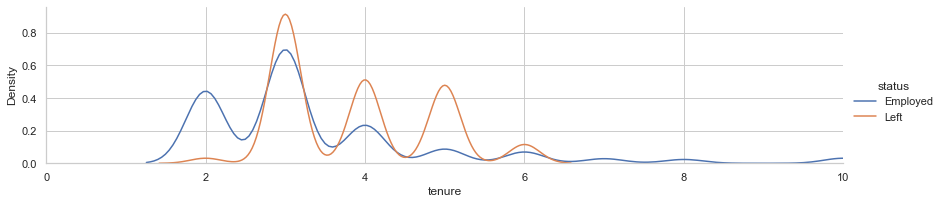

In [101]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'tenure')
facet.set(xlim=(0, df['tenure'].max()))
facet.add_legend()

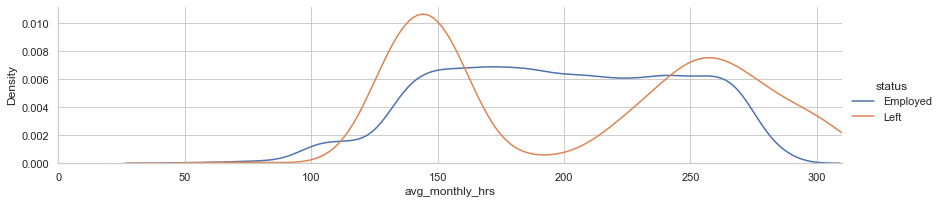

In [102]:
facet = sns.FacetGrid(df, hue="status",aspect=4, hue_order=['Employed', 'Left'])
facet.map(sns.kdeplot,'avg_monthly_hrs')
facet.set(xlim=(0, df['avg_monthly_hrs'].max()))
facet.add_legend()

In [103]:
left_df = df[(df['status'] == 'Left')]
employed_df = df[(df['status'] != 'Left')]

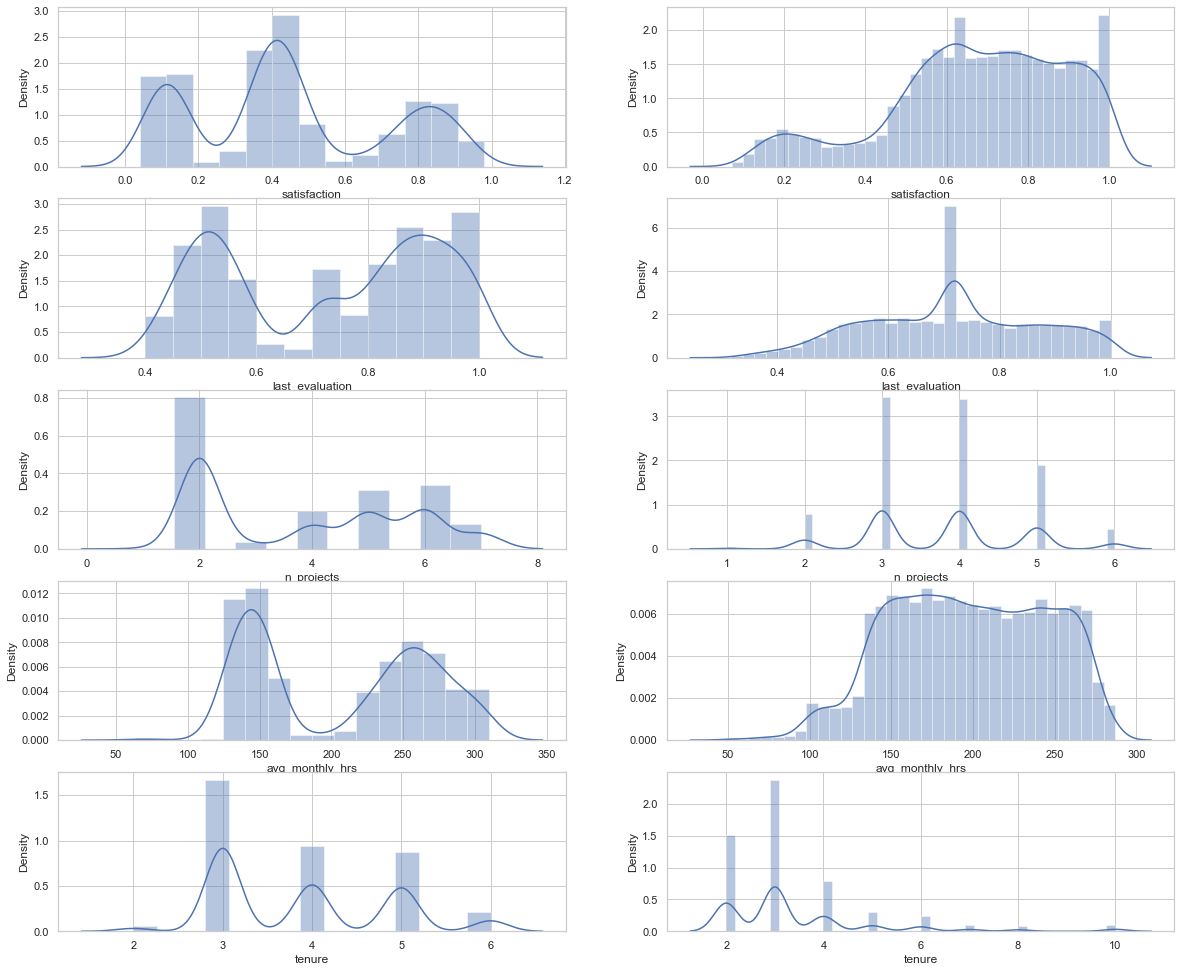

In [104]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,17))
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
ax10 = fig.add_subplot(5,2,10)# Tell pointplot to plot on ax1 with the ax argument (satisfaction level)
sns.distplot(left_df['satisfaction'],ax = ax1);
sns.distplot(employed_df['satisfaction'],ax = ax2);
sns.distplot(left_df['last_evaluation'], kde=True,ax=ax3);
sns.distplot(employed_df['last_evaluation'], kde=True,ax=ax4);
sns.distplot(left_df['n_projects'], kde=True,ax=ax5);
sns.distplot(employed_df['n_projects'], kde=True,ax=ax6);
sns.distplot(left_df['avg_monthly_hrs'], kde=True,ax=ax7);
sns.distplot(employed_df['avg_monthly_hrs'], kde=True,ax=ax8);
sns.distplot(left_df['tenure'], kde=True,ax=ax9);
sns.distplot(employed_df['tenure'], kde=True,ax=ax10);

### Insights: People who left

  -  satisfaction: Employees who left include both satisfied and dissatisfied with their job.
  -  last_evaluation: People leaving the company are majorly high and low performers. 
  
    So it could be that they did not get the right opportunities to work or maybe they got better opportunities elsewhere.
  -  n_projects: Most people are working on 2 projects.
  -  avg_montly_hrs: The average of 160 to 220 hours working people seem to be staying back. Those who are working less seem to be disconnected (lack of interest, motivation, etc.) and those working overtime seemed to be stressed.
  -  tenure: 3-5 years seems to be the age range where people decide if they want to stay back or leave. 

Text(0.5, 1.0, 'Pie chart showing the proportion of Salary in Attrition')

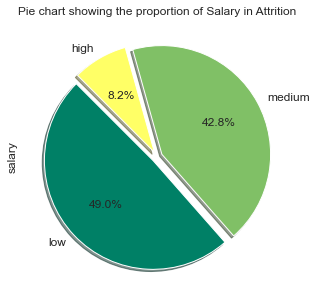

In [105]:
df['salary'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, cmap='summer')

plt.ylabel('salary')
plt.title('Pie chart showing the proportion of Salary in Attrition')

Text(0.5, 1.0, 'Pie chart showing the proportion of marital_status in Attrition')

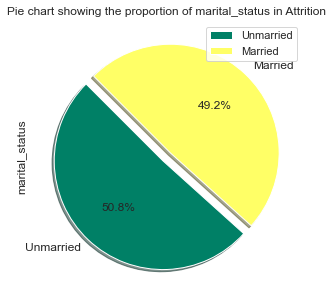

In [107]:
df['marital_status'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('marital_status')
plt.title('Pie chart showing the proportion of marital_status in Attrition')

<Figure size 1440x576 with 0 Axes>

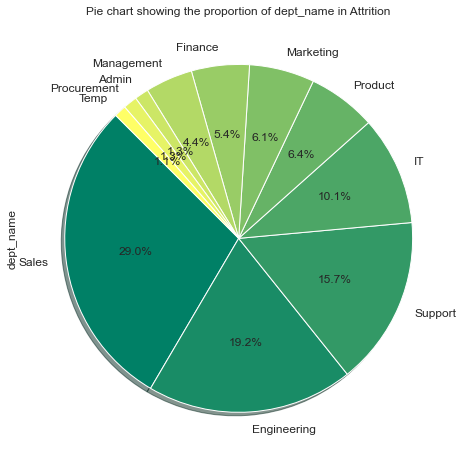

<Figure size 1440x576 with 0 Axes>

In [109]:
df['dept_name'].value_counts().plot(kind='pie',  fontsize=12, autopct='%3.1f%%', 
                                               figsize=(10,8), shadow=True, startangle=135, cmap='summer')
plt.ylabel('dept_name')
plt.title('Pie chart showing the proportion of dept_name in Attrition')

plt.figure(figsize = (20, 8))

Text(0.5, 1.0, 'Attrition by Department')

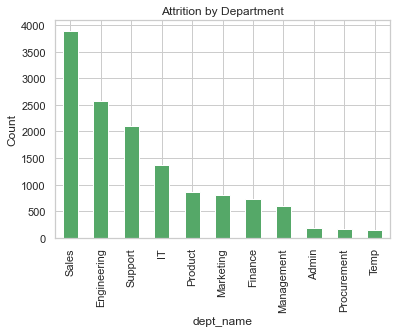

In [111]:

df.groupby('dept_name')['employee_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('Attrition by Department')

Text(0.5, 1.0, 'Attrition by tenure')

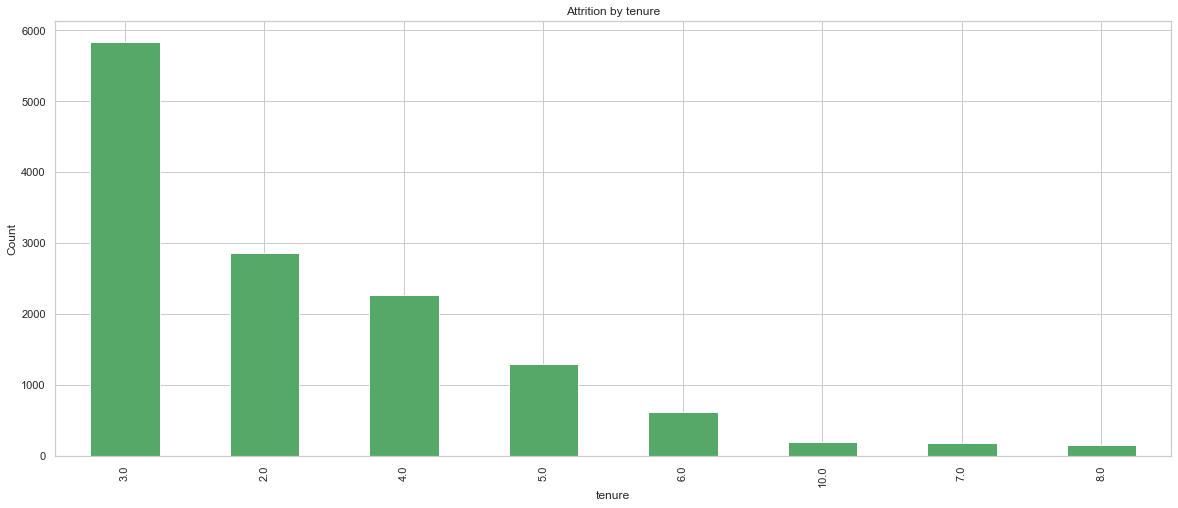

In [113]:

plt.figure(figsize = (20, 8))
df.groupby('tenure')['employee_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('Attrition by tenure')


Text(0.5, 1.0, 'Attrition by Salary')

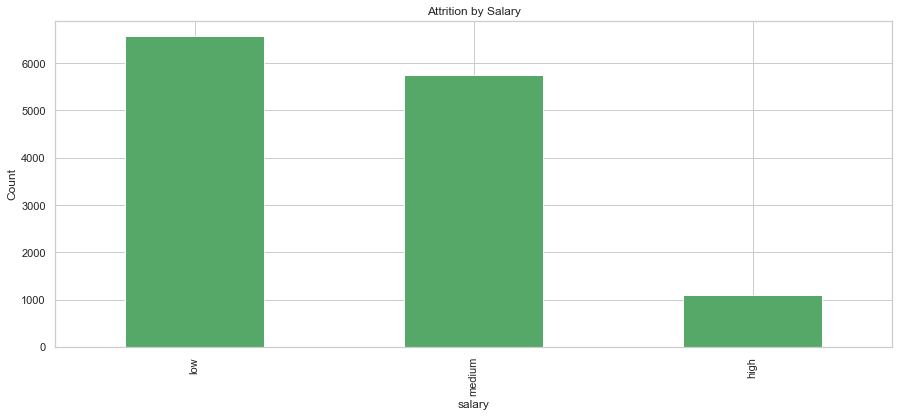

In [114]:
plt.figure(figsize = (15, 6))
df.groupby('salary')['employee_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('Attrition by Salary')

Text(0.5, 1.0, 'Department Vs Tenure ')

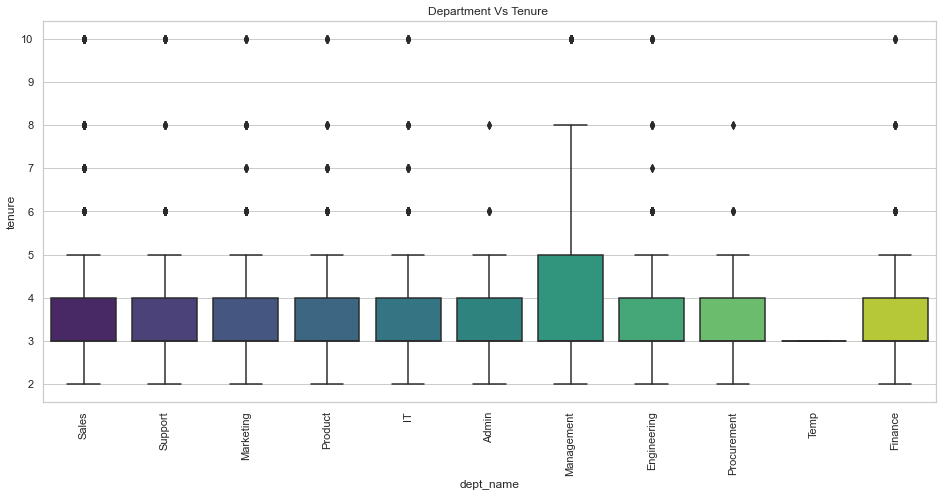

In [115]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='dept_name', y='tenure', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.title('Department Vs Tenure ')

Text(0.5, 1.0, 'Salary Vs Tenure ')

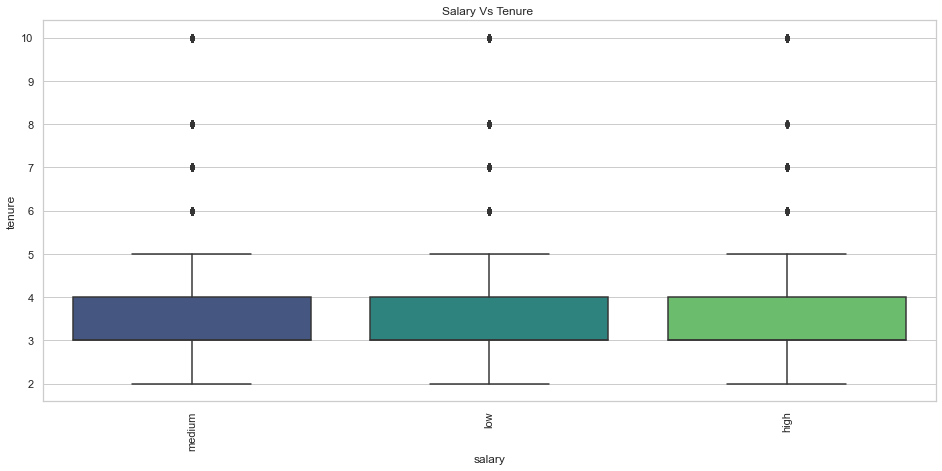

In [116]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='salary', y='tenure', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.title('Salary Vs Tenure ')

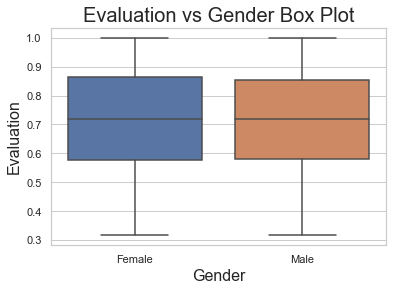

In [117]:
sns.boxplot(df['gender'], df['last_evaluation'])
plt.title('Evaluation vs Gender Box Plot', fontsize=20)      
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Evaluation', fontsize=16)
plt.show()

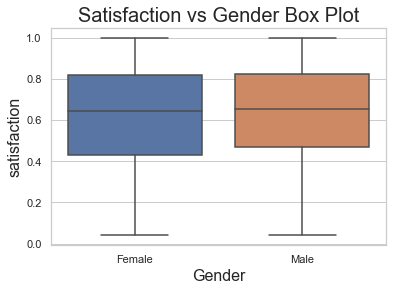

In [118]:
sns.boxplot(df['gender'], df['satisfaction'])
plt.title('Satisfaction vs Gender Box Plot', fontsize=20)      
plt.xlabel('Gender', fontsize=16)
plt.ylabel('satisfaction', fontsize=16)
plt.show()

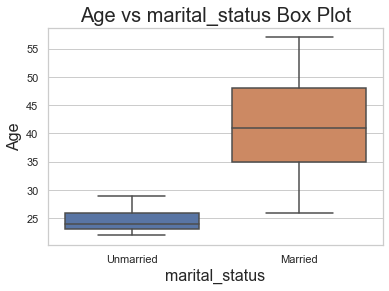

In [119]:
sns.boxplot(df['marital_status'], df['age'])
plt.title('Age vs marital_status Box Plot', fontsize=20)      
plt.xlabel('marital_status', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

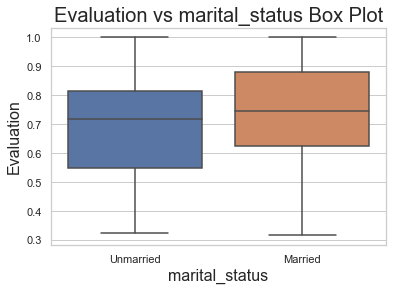

In [120]:
sns.boxplot(df['marital_status'], df['last_evaluation'])
plt.title('Evaluation vs marital_status Box Plot', fontsize=20)      
plt.xlabel('marital_status', fontsize=16)
plt.ylabel('Evaluation', fontsize=16)
plt.show()

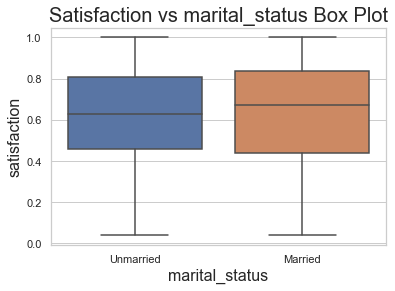

In [121]:
sns.boxplot(df['marital_status'], df['satisfaction'])
plt.title('Satisfaction vs marital_status Box Plot', fontsize=20)      
plt.xlabel('marital_status', fontsize=16)
plt.ylabel('satisfaction', fontsize=16)
plt.show()

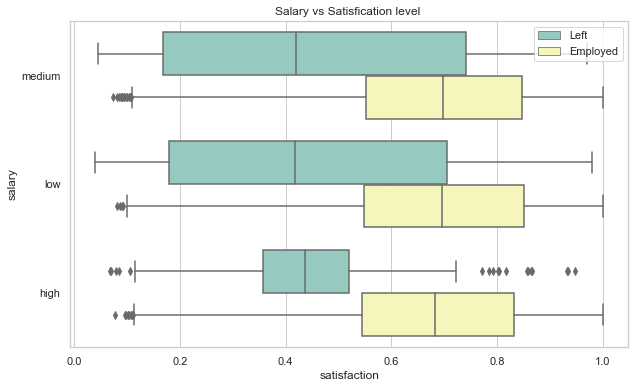

In [122]:
def plot6():
    # Plotting Salary against satisfaction 
    plt.figure(figsize=(10,6))
    sns.boxplot(x='satisfaction', y='salary', data=df, hue='status',palette='Set3')
    plt.legend(loc='upper right')
    plt.title('Salary vs Satisfication level ')
    plt.show()
plot6()

<AxesSubplot:>

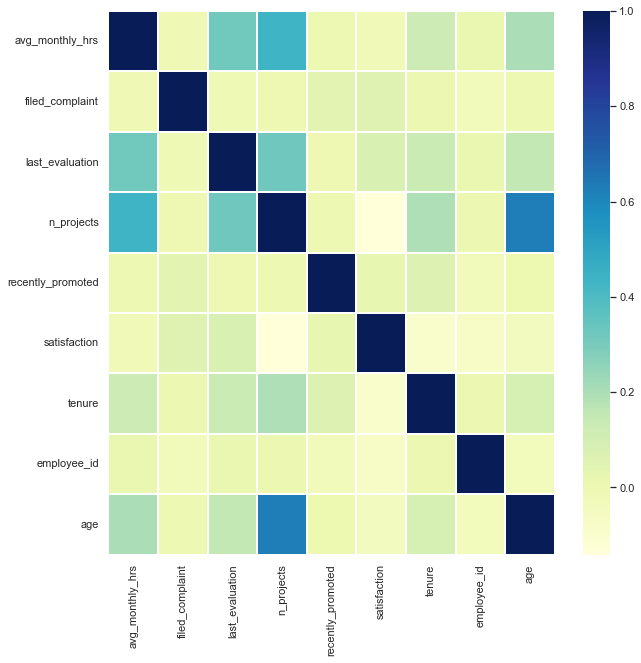

In [123]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(10, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Correlation between parameters only for those employees who have left


<AxesSubplot:>

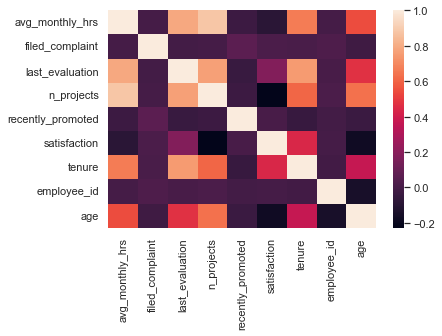

In [124]:
print("Correlation between parameters only for those employees who have left")
corr = left_df.corr()
sns.heatmap(corr)

Correlation between parameters only for those employees who are still employed


<AxesSubplot:>

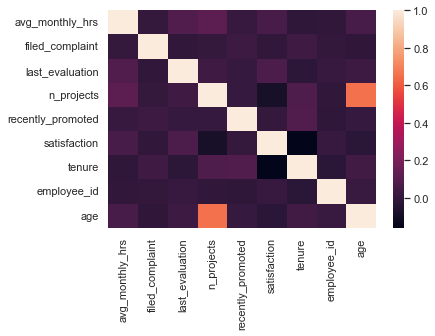

In [125]:
print("Correlation between parameters only for those employees who are still employed")
corr = employed_df.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='dept_name', ylabel='count'>

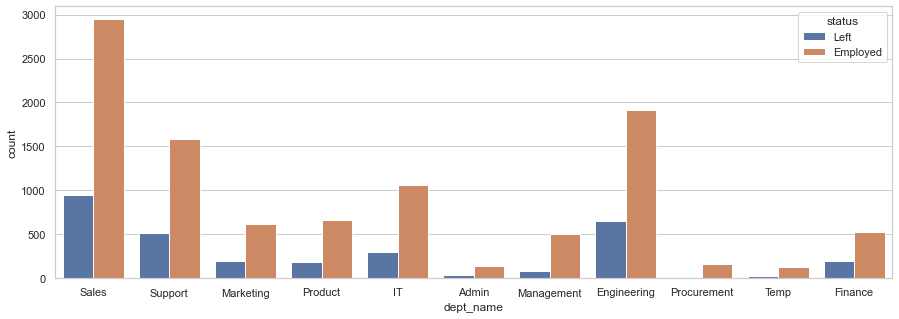

In [126]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='dept_name', hue="status", data=df, ax=axis1)

In [128]:
departments = df['dept_name'].unique()
departments = departments[departments != 'unknown']
departments

array(['Sales', 'Support', 'Marketing', 'Product', 'IT', 'Admin',
       'Management', 'Engineering', 'Procurement', 'Temp', 'Finance'],
      dtype=object)

In [129]:
print ("Department  - Employees % - Dept. Attrition % - Overall Attrition %")
for dept in departments:
    print ("%-11s - %-11.2f - %-17.2f - %-6.2f" %(dept, \
                                        df[(df['dept_name'] == dept)]['dept_name'].count()/df['dept_name'].count() * 100, \
                                        df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['dept_name'] == dept)]['dept_name'].count() * 100, \
                                        df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['status'] == "Left")]['dept_name'].count() * 100))

Department  - Employees % - Dept. Attrition % - Overall Attrition %
Sales       - 29.05       - 24.36             - 30.13 
Support     - 15.72       - 24.62             - 16.48 
Marketing   - 6.06        - 24.01             - 6.19  
Product     - 6.36        - 21.92             - 5.94  
IT          - 10.13       - 21.85             - 9.43  
Admin       - 1.30        - 20.00             - 1.11  
Management  - 4.40        - 14.41             - 2.70  
Engineering - 19.19       - 25.42             - 20.76 
Procurement - 1.29        - 9.25              - 0.51  
Temp        - 1.12        - 13.33             - 0.63  
Finance     - 5.38        - 26.73             - 6.13  


In [130]:
employee_count_by_department = np.zeros(len(departments))
dept_attrition = np.zeros(len(departments))
overall_attrition = np.zeros(len(departments))
i = 0
for dept in departments:
    employee_count_by_department[i] = df[(df['dept_name'] == dept)]['dept_name'].count()/df['dept_name'].count() * 100
    dept_attrition[i] = df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['dept_name'] == dept)]['dept_name'].count() * 100
    overall_attrition[i] = df[(df['dept_name'] == dept) & (df['status'] == "Left")]['dept_name'].count()/df[(df['status'] == "Left")]['dept_name'].count() * 100
    i += 1

attrition_df = pd.DataFrame({'Employee_Percentage': employee_count_by_department, 'Dept_attrition': dept_attrition, 'Overall_attrition': overall_attrition}, index=departments)
attrition_df

,Employee_Percentage,Dept_attrition,Overall_attrition
Sales,29.045488,24.364570,30.126984
Support,15.719612,24.620493,16.476190
Marketing,6.055183,24.014778,6.190476
Product,6.360925,21.922626,5.936508
IT,10.134228,21.854305,9.428571
Admin,1.304996,20.000000,1.111111
Management,4.399702,14.406780,2.698413
Engineering,19.187174,25.417800,20.761905
Procurement,1.290082,9.248555,0.507937
Temp,1.118568,13.333333,0.634921


<AxesSubplot:xlabel='dept_name', ylabel='avg_monthly_hrs'>

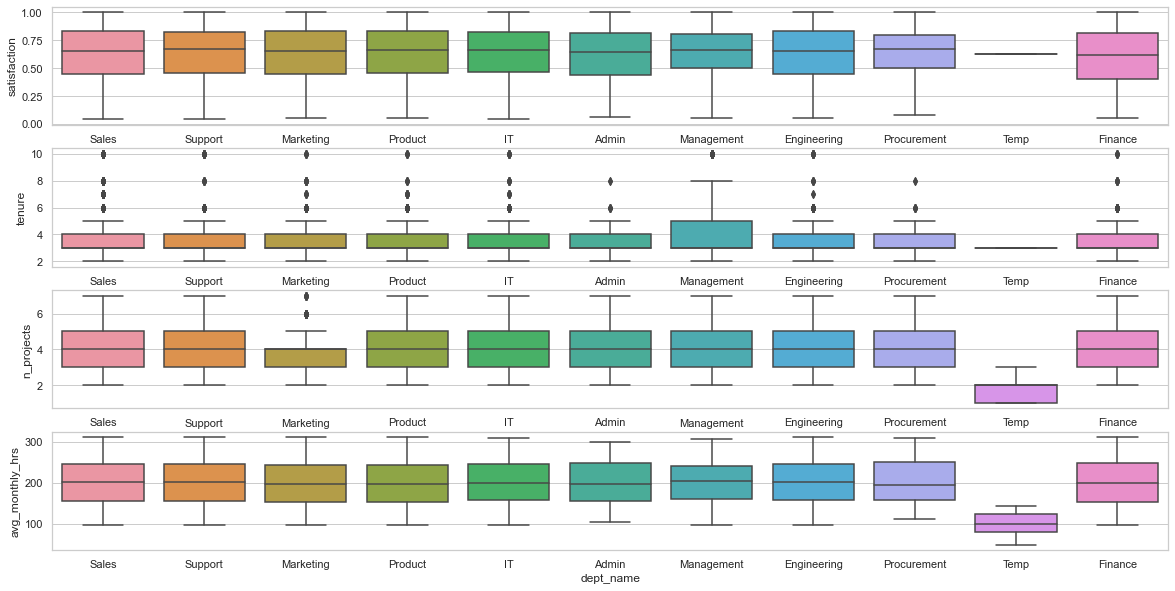

In [131]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="dept_name",y="satisfaction",data=df,ax=ax1)
sns.boxplot(x="dept_name",y="tenure",data=df,ax=ax2)
sns.boxplot(x="dept_name",y="n_projects",data=df,ax=ax3)
sns.boxplot(x="dept_name",y="avg_monthly_hrs",data=df,ax=ax4)

<AxesSubplot:xlabel='dept_name', ylabel='avg_monthly_hrs'>

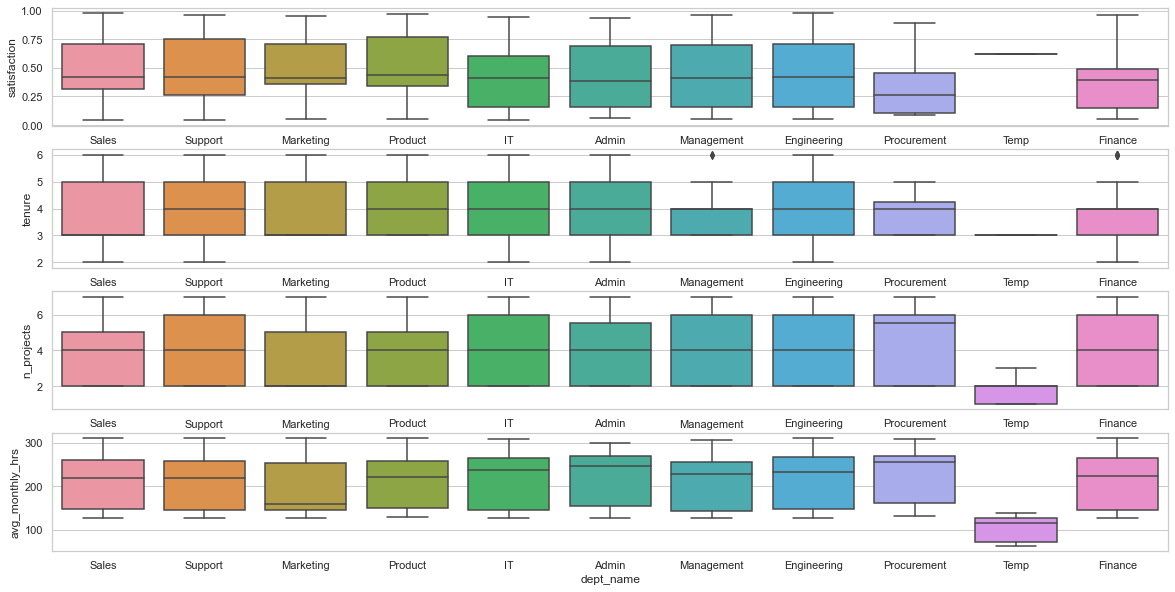

In [132]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.boxplot(x="dept_name",y="satisfaction",data=left_df,ax=ax1)
sns.boxplot(x="dept_name",y="tenure",data=left_df,ax=ax2)
sns.boxplot(x="dept_name",y="n_projects",data=left_df,ax=ax3)
sns.boxplot(x="dept_name",y="avg_monthly_hrs",data=left_df,ax=ax4)

### Insights: Departmental Data
 -   The satisfaction level in Sales, engineering and support department is actually higher than procurement and finance, but has low salary . This means that probably they left because of low salary.
 -    Finance have the lowest satisfaction level , can be reason for attriton 
 -    Procurement team is handling more projects and more working hours so Work Balance might be the critical factor for attrition
  -  Marketing and product have high satisfaction levels despite high rate of quitting due to low salary.
  
FUrther  married people tend to quit less compared to unmarried ,seems more stable.women quitting is  high may be due to marriage, child care,family pressure.

### Observations
    1. Employee status Vs Age :
        a. We observed that large numer of employees are from age 20 to 35 years and the attrition rate of the employees are more in the same age group.  Greater the experience less is the attrition rate.
					
    2. Graph - Employee status with respect to Last Evaluation:
        a. We observed the graph for the employees evaluated between 0.4 to 0.6 and 0.8 to 1. 
        Lesser evaluation relates to low performance and greater evaluation relates to highly skilled employees. 
        In both the scenarios attrition rate is high. Employees between 0.6 to 0.8 comes under the mid range who are stable in the organization.
					
    3. Employee satisfaction is a very important role in attriton, if employee are satisfied then the attrition rate would be less. Employee having satisfaction rate 0.5 to 1 are the satisfied employees and they are working in the organization. Majority of the employees below 0.5 satisfaction rate left the organization.
    
    4. If we observe the tenure column, we can see that employee left the organization within a tenure of 3 to 5. More the number of years of experience, the employee stays in the organisation.
					
    5. There are almost 50% of female employees as compared to the male employees. If we observe the gender graph, attrition rate of female is more. HR team should make all possibe changes to the policies for women to reduce the attrition rate by some extent for e.g. work from home facility and child care facility. Most women quit or take a break from the work. We can encourage female employees by providing good policies, work from home facility etc.	
					
    6. last_evaluation Vs satisfaction with respect to the employee status:
       We observed three clusters. Employees are getting clubbed, they are related to each other. There is dissatisfaction among those who are performing very good as well as those performing very bad.	
					
    7. If we observe the average working hours of employees, employee who left the organization either work very less i.e. between 125 to 175 hrs and maximum from 240 to 300 hrs. For maximum working hours we can assume that the work pressure was too high  or the work was not intersingor challenging enough as per employee. Management team need to improve the work culture to facilitate good work life balance for the employees. 	
					
    8. Strong positive correlation between no. of projects and avg monthly hrs: 
        a. More the no of projects, more the time an employee has spent. This could be possibly the reason of dissatisfaction.
        b. Very strong positive correlation between last_evaluation and avg_monthly_hrs. This indicates that the longer the monthly hours, the more likely you get a good last evaluation. 
        c. So, people working on multiple projects tend to spend more time and are maybe dissatisfied due to that.
        d. Minimize the number of projects people have to work, encourage them to share the work load, take vacations to ease the stress off them	
					
    9. The satisfaction level in Sales, engineering and support department is actually higher than procurement and finance. 
       a. This means that probably employees left because of low salary given in these departments.
       b. Procurement and Finance have the lowest satisfaction level with most of the quartiles located below 0.5. So that could account for the attrition in finance but not procurement team. Procurement team is handling more projects and their working hours are still in the niche region. Work Balance might be the critical factor here.
       c. Marketing and product have high satisfaction levels despite high rate of quitting owing low salary.
       d. Salary normalization as per market standards is recommended. The salary distribution seems to uneven and would cause discrepancies.
       e. One could also provide incentives for the best performers and keep them motivated. 
					
    10. One interesting observation is that married people tend to quit less compared to unmarried. This is probably that the former wants more settlement than risk taking attitude. Give more challenging opportunities to the capable ones.	
					
    11.	An interesting observation is that the last evaluation of married people is higher in general compared to unmarried people. But as far as satisfaction, unmarried people are doing better off. This might be due to the fact that the married people are getting less salary but have more responsiblities. Again salary correction might check this off.	
					
    12.	The top three departments in terms of attrition are Sales, Engineering and Support which also account for 65% of the total sales force. But a small department(5% of total work force) like Finance has the highest department level attrition of about 27%. Low salary might be the concern because their working hours seem to be in the normal range but satisfaction is pretty low.

---
<a name = Section6></a>
# 6. Data Preparation and Feature Engineering

For categorical columns, It is advised to encode them to fit them better in a model.

In [133]:
df.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

In [ ]:
# remove the department id, emp id, dept head as these columns are not required
df_copy = df.copy()
df = df.drop(['dept_id', 'dept_head', 'employee_id'], 1)

In [134]:
# remove the department id, emp id, dept head as these columns are not required
df_copy = df.copy()
df = df.drop(['dept_id', 'dept_head', 'employee_id'], 1)

In [135]:
#label encode the cateorical features
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['marital_status'] = le.fit_transform(df['marital_status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['salary'] = le.fit_transform(df['salary'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['status'] = le.fit_transform(df['status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['dept_name'] = le.fit_transform(df['dept_name'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1}
{'Married': 0, 'Unmarried': 1}
{'high': 0, 'low': 1, 'medium': 2}
{'Employed': 0, 'Left': 1}
{'Admin': 0, 'Engineering': 1, 'Finance': 2, 'IT': 3, 'Management': 4, 'Marketing': 5, 'Procurement': 6, 'Product': 7, 'Sales': 8, 'Support': 9, 'Temp': 10}


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 2 to 14115
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13410 non-null  float64
 1   filed_complaint    13410 non-null  float64
 2   last_evaluation    13410 non-null  float64
 3   n_projects         13410 non-null  int64  
 4   recently_promoted  13410 non-null  float64
 5   salary             13410 non-null  int32  
 6   satisfaction       13410 non-null  float64
 7   status             13410 non-null  int32  
 8   tenure             13410 non-null  float64
 9   age                13410 non-null  int64  
 10  gender             13410 non-null  int32  
 11  marital_status     13410 non-null  int32  
 12  dept_name          13410 non-null  int32  
dtypes: float64(6), int32(5), int64(2)
memory usage: 1.7 MB


In [297]:
df.to_csv('1012_Employee_data_encoded.csv')

<AxesSubplot:>

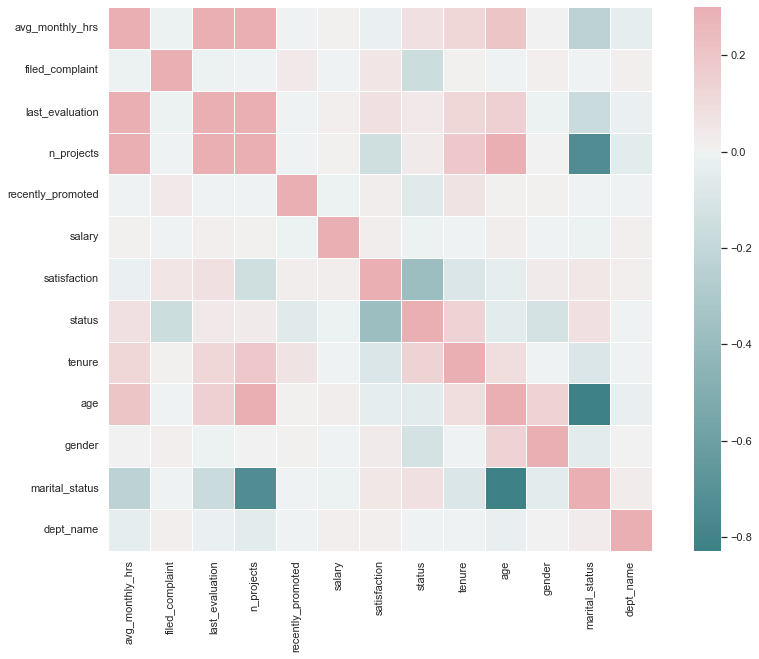

In [298]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

---
<a name = Section6></a>
# **6. Model Development & Evaluation**

Since this is a classification problem, we would build the below models and compare them for efficiency.
1. Logistic Regression
2. Decision Tree Clasifier
3. Random Forest Classifier
4. KNN Model
5. Naive Bayes classifier
6. SVC Model
7. Gradient Boosting Model
8. XGBoost Model
    

 ## Build Models

In [299]:
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,dept_name
2,156.0,1.0,0.474082,2,0.0,2,0.405101,1,3.0,24,0,1,8
3,256.0,0.0,0.961360,6,0.0,1,0.152974,1,4.0,51,0,0,9
4,146.0,0.0,0.507349,2,0.0,2,0.434845,1,3.0,23,0,1,8
5,135.0,0.0,0.482184,2,0.0,1,0.381545,1,3.0,23,0,1,5
6,270.0,0.0,0.867087,6,0.0,1,0.172575,1,4.0,24,0,1,7


In [300]:
X = df.drop(columns='status')
y = df.status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (10728, 12)
Y Train Shape  (10728,)
X Test Shape  (2682, 12)
Y Test Shape  (2682,)


### 1. Logistic Regression

In [142]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [143]:
y_pred_test = logreg.predict(X_test)

# Accuracy score
logreg_ac = accuracy_score(y_test, y_pred_test)*100
print('Accuracy is :',logreg_ac)

Accuracy is : 78.63534675615213


In [144]:
# Confusion matrix
def print_confusion_matrix_employee(y_actual, y_pred, modelName):
    cnf_matrix = confusion_matrix(y_actual, y_pred)
    cnf_mat_df = pd.DataFrame(cnf_matrix)
    cnf_mat_df.index = ['Actual Employee','Actual Left']
    cnf_mat_df.columns = ['Predicted Employee','Predicted Left']
    print("Confusion matrix for %s model" %modelName)
    print(cnf_mat_df)

In [301]:
print_confusion_matrix_employee(y_test, y_pred_test, "Logistic Regression")

Confusion matrix for Logistic Regression model
                 Predicted Employee  Predicted Left
Actual Employee                1895             121
Actual Left                     452             214


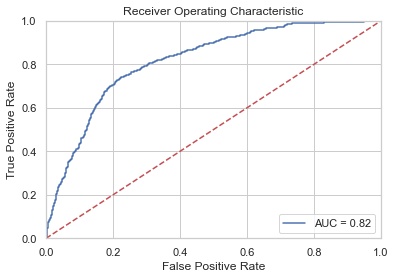

In [146]:
# AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [147]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2016
           1       0.64      0.32      0.43       666

    accuracy                           0.79      2682
   macro avg       0.72      0.63      0.65      2682
weighted avg       0.77      0.79      0.76      2682



### 2. Decision Tree Clasifiers

In [148]:
dtmodel = tree.DecisionTreeClassifier(random_state = 0)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [149]:
y_pred_test1 = dtmodel.predict(X_test)

DecisionT_Accuracy = accuracy_score(y_test,y_pred_test1)*100
print('Accuracy:', DecisionT_Accuracy)

Accuracy: 96.45786726323638


In [150]:
print_confusion_matrix_employee(y_test, y_pred_test1, "Decision Tree")

Confusion matrix for Decision Tree model
                 Predicted Employee  Predicted Left
Actual Employee                1967              49
Actual Left                      46             620


In [151]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2016
           1       0.93      0.93      0.93       666

    accuracy                           0.96      2682
   macro avg       0.95      0.95      0.95      2682
weighted avg       0.96      0.96      0.96      2682



### 3. Random Forest Classifier

In [152]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [153]:
y_pred_test2 = rfc.predict(X_test)

rfc_ac = accuracy_score(y_test,y_pred_test2)*100
print('Accuracy is :',rfc_ac)

Accuracy is : 97.6882923191648


In [154]:
print_confusion_matrix_employee(y_test, y_pred_test2, "Random Forest Classifier")

Confusion matrix for Random Forest Classifier model
                 Predicted Employee  Predicted Left
Actual Employee                2004              12
Actual Left                      50             616


In [155]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2016
           1       0.98      0.92      0.95       666

    accuracy                           0.98      2682
   macro avg       0.98      0.96      0.97      2682
weighted avg       0.98      0.98      0.98      2682



### 4. KNN Model

In [156]:
knn = KNeighborsClassifier(n_neighbors =1 )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [157]:
y_pred_test3 = knn.predict(X_test)

knn_ac = accuracy_score(y_test,y_pred_test3)*100
print('Accuracy is :',knn_ac)

Accuracy is : 90.79045488441461


In [158]:
print_confusion_matrix_employee(y_test, y_pred_test3, "KNN")

Confusion matrix for KNN model
                 Predicted Employee  Predicted Left
Actual Employee                1864             152
Actual Left                      95             571


In [159]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2016
           1       0.79      0.86      0.82       666

    accuracy                           0.91      2682
   macro avg       0.87      0.89      0.88      2682
weighted avg       0.91      0.91      0.91      2682



### 5. Naive Bayes classifier

In [160]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [161]:
y_pred_test4 = nb.predict(X_test)

nb_ac = accuracy_score(y_test,y_pred_test4)*100
print('Accuracy is :',nb_ac)

Accuracy is : 81.09619686800895


In [162]:
print_confusion_matrix_employee(y_test, y_pred_test4, "Naive Bayes Classifier")

Confusion matrix for Naive Bayes Classifier model
                 Predicted Employee  Predicted Left
Actual Employee                1681             335
Actual Left                     172             494


In [163]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2016
           1       0.60      0.74      0.66       666

    accuracy                           0.81      2682
   macro avg       0.75      0.79      0.76      2682
weighted avg       0.83      0.81      0.82      2682



### 6. SVC Model

In [164]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [165]:
y_pred_test5 = svc.predict(X_test)

svc_ac = accuracy_score(y_test,y_pred_test5)*100
print('Accuracy is :',svc_ac)

Accuracy is : 77.62863534675614


In [166]:
print_confusion_matrix_employee(y_test, y_pred_test5, "SVC")

Confusion matrix for SVC model
                 Predicted Employee  Predicted Left
Actual Employee                2013               3
Actual Left                     597              69


In [167]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2016
           1       0.96      0.10      0.19       666

    accuracy                           0.78      2682
   macro avg       0.86      0.55      0.53      2682
weighted avg       0.82      0.78      0.70      2682



### 7. Gradient Boosting Model

In [168]:
gb_model= GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=1)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [169]:
y_pred_test6 = gb_model.predict(X_test)

gb_ac = accuracy_score(y_test,y_pred_test6)*100
print('Accuracy is :',gb_ac)

Accuracy is : 96.94258016405666


In [170]:
print_confusion_matrix_employee(y_test, y_pred_test6, "Gradient Boosting")

Confusion matrix for Gradient Boosting model
                 Predicted Employee  Predicted Left
Actual Employee                1990              26
Actual Left                      56             610


In [171]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2016
           1       0.96      0.92      0.94       666

    accuracy                           0.97      2682
   macro avg       0.97      0.95      0.96      2682
weighted avg       0.97      0.97      0.97      2682



### 8. XGBoost Model

In [175]:
!pip install xgboost

In [176]:
from xgboost import XGBClassifier

In [177]:
xgb_model=XGBClassifier(random_state=1,learning_rate=0.10)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [178]:
y_pred_test7=xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test,y_pred_test7)*100
print('Accuracy is :',xgb_ac)

Accuracy is : 97.53914988814317


In [179]:
print_confusion_matrix_employee(y_test, y_pred_test7, "XGBoost")

Confusion matrix for XGBoost model
                 Predicted Employee  Predicted Left
Actual Employee                2000              16
Actual Left                      50             616


In [180]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test7))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2016
           1       0.97      0.92      0.95       666

    accuracy                           0.98      2682
   macro avg       0.98      0.96      0.97      2682
weighted avg       0.98      0.98      0.98      2682



## Evaluate models and finalize the model

### ComparisonTable

| Sr no.| Model | Accuracy score | Precision | Recall | f1-score |
| - | - | - | - | - | - |
| 1. | Logistic Regression  | 78.33 | 0.75 | 0.78 | 0.75 | 
| 2. | Decision Tree Clasifiers | 96.45 | 0.97 | 0.97 | 0.97 |
| 3. | Random Forest Classifier | 97.68 | 0.98 | 0.98 | 0.98 |
| 4. | KNN Model | 90.79 | 0.91 | 0.91 | 0.91 |
| 5. | Naive Bayes classifier | 81.09 | 0.80 | 0.82 | 0.81 |
| 6. | SVC Model | 92.09 | 0.92 | 0.92 | 0.92 |
| 7. | Gradient Boosting Model | 96.94 | 0.97 | 0.97 | 0.97 |
| 8. | XGBoost Model | 96.71 | 0.97 | 0.97 | 0.97 |

### __Due to the high accuracy and precision, we are choosing the *Random Forest Classifier* model__


### Fit and tune models with cross-validation

In [181]:
# Decision Tree Clasifiers
scores1 = cross_val_score(dtmodel, X, y, cv=10, scoring='accuracy') 
scores1.mean()

0.9620432513049962

In [182]:
# Random Forest Classifier
scores2 = cross_val_score(rfc, X, y, cv=10, scoring='accuracy') 
scores2.mean()

0.9762117822520509

In [183]:
# Gradient Boosting Model
scores3 = cross_val_score(gb_model, X, y, cv=10, scoring='accuracy') 
scores3.mean()

0.96972408650261

In [184]:
# KNN Model
scores4 = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
scores4.mean()

0.9008948545861297

###  _Random Forest Classifier_ is a winner 

### hyper-parameters to tune the model

In [185]:
rfc = RandomForestClassifier()
grid_param = {'n_estimators': [300,400,500,600], 'max_depth':[10,15,20], "min_samples_leaf": [2,4,6]}
rfc_grid = GridSearchCV(estimator=rfc, param_grid=grid_param,cv=5)
rfc_grid.fit( X_train , y_train)
y_pred_test_hp = rfc_grid.predict(X_test)

In [186]:
print(rfc_grid.best_params_)

{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 600}


In [187]:
selected_model = metrics.accuracy_score(y_test, y_pred_test_hp)*100
print('Accuracy is :',selected_model)

Accuracy is : 97.57643549589858


In [188]:
print(rfc_grid.best_estimator_)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=600)


In [189]:
print_confusion_matrix_employee(y_test, y_pred_test_hp, "Random Forest Classifier Hyper-Parameters")

Confusion matrix for Random Forest Classifier Hyper-Parameters model
                 Predicted Employee  Predicted Left
Actual Employee                2007               9
Actual Left                      56             610


In [190]:
# Compute and print the confusion matrix
print(metrics.classification_report(y_test,y_pred_test_hp))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2016
           1       0.99      0.92      0.95       666

    accuracy                           0.98      2682
   macro avg       0.98      0.96      0.97      2682
weighted avg       0.98      0.98      0.98      2682



### Feature Importance

In [191]:
rfc_feature_imp=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
rfc_feature_imp.fit( X_train , y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=600,
                       n_jobs=1)

age 0.028076853212396606
avg_monthly_hrs 0.17000960427181538
dept_name 0.012792168886302743
filed_complaint 0.00820816597983128
gender 0.006396155203239944
last_evaluation 0.1017440938363818
marital_status 0.010083972970954853
n_projects 0.20766476647048746
recently_promoted 0.0009914481603544086
salary 0.008377145754117757
satisfaction 0.26013999788013076
tenure 0.185515627373987


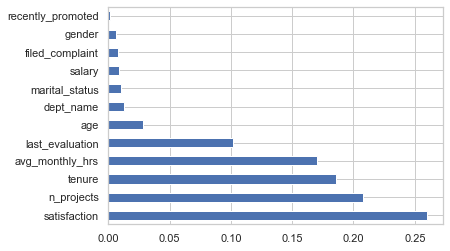

In [193]:
feat_importances = pd.Series(rfc_feature_imp.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
for i, j in sorted(zip(X_train.columns, rfc_feature_imp.feature_importances_)):
    print(i, j)

### From the feature importance plot, it seems _satisfaction_ has a major say in determining attrition of employees followed by _number of projects_.

---
<a name = Section7></a>
# 7. Predicting the unkown

## a. Format the unseen data as per our model

In [325]:
# Import the unseen data
unseen_Data = pd.read_csv('https://docs.google.com/spreadsheets/d/109F8vvKJRlpu3o1PHs12v8RWJRqIf53J_Q6gG8ZpNBQ/export?gid=1947002331&format=csv') # if needed index_col=0
unseen_Data.to_csv('unseenData.csv')
unseen_Data.head(5)



,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [326]:
unseen_Data.shape

(100, 10)

In [327]:
unseen_Data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure',
       'employee_id'],
      dtype='object')

In [328]:
unseen_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [329]:
unseen_Data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,100.000000,15.0,83.000000,100.000000,3.0,97.000000,97.000000,100.000000
mean,198.810000,1.0,0.744114,3.760000,1.0,0.629632,3.422680,112515.750000
std,53.185723,0.0,0.169536,1.349298,0.0,0.246901,1.566811,9466.676715
min,68.000000,1.0,0.396801,1.000000,1.0,0.051515,2.000000,100230.000000
25%,154.500000,1.0,0.576181,3.000000,1.0,0.477002,2.000000,105855.000000
50%,206.000000,1.0,0.748131,4.000000,1.0,0.660827,3.000000,110557.000000
75%,247.500000,1.0,0.901458,5.000000,1.0,0.832039,4.000000,117130.250000
max,289.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,145105.000000


In [330]:
unseen_Data.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
count,100.000000,98,15.0,83.000000,100.000000,3.0,100,97.000000,97.000000,100.000000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN
mean,198.810000,NaN,1.0,0.744114,3.760000,1.0,NaN,0.629632,3.422680,112515.750000
std,53.185723,NaN,0.0,0.169536,1.349298,0.0,NaN,0.246901,1.566811,9466.676715
min,68.000000,NaN,1.0,0.396801,1.000000,1.0,NaN,0.051515,2.000000,100230.000000
25%,154.500000,NaN,1.0,0.576181,3.000000,1.0,NaN,0.477002,2.000000,105855.000000
50%,206.000000,NaN,1.0,0.748131,4.000000,1.0,NaN,0.660827,3.000000,110557.000000
75%,247.500000,NaN,1.0,0.901458,5.000000,1.0,NaN,0.832039,4.000000,117130.250000


In [331]:
print(unseen_Data['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan '-IT' 'D00-AD']


In [332]:
unseen_Data['department'].replace({'-IT': 'D00-IT'}, inplace=True)

In [333]:
print(unseen_Data['department'].unique())

['D00-IT' 'D00-PD' 'D00-SS' 'D00-PR' 'D00-FN' 'D00-MT' 'D00-MN' 'D00-ENG'
 'D00-SP' 'D00-TP' nan 'D00-AD']


In [334]:
unseen_Data.isnull().sum()[unseenData.isnull().sum() !=0]

department            2
filed_complaint      85
last_evaluation      17
recently_promoted    97
satisfaction          3
tenure                3
dtype: int64

<AxesSubplot:xlabel='missing_count_percentage', ylabel='features'>

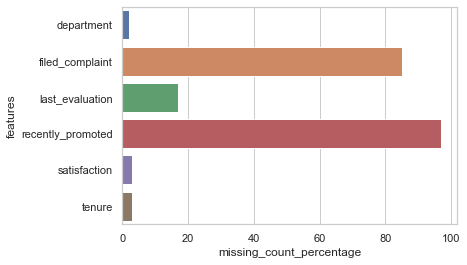

In [335]:
missing = unseen_Data.isnull().sum()[unseen_Data.isnull().sum() !=0]
missing = pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing['missing_count_percentage'] = ((missing['missing_count'])/unseenData.shape[0])*100
plt.figure()
sns.barplot(y = missing['features'], x = missing['missing_count_percentage'])

In [339]:
df_Final_Data= pd.merge(unseen_Data, df_emp_data, how='left', on="employee_id")

In [340]:
df_Final_Data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045,27,Male,Unmarried
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223,23,Male,Unmarried
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924,26,Male,Unmarried
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922,52,Male,Married
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297,27,Male,Unmarried


In [341]:
df_Final_Data.shape

(100, 13)

In [342]:
df_Final_Data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status'],
      dtype='object')

In [343]:
df_Final_Data.isnull().sum()[df_Final_Data.isnull().sum() !=0]

department            2
filed_complaint      85
last_evaluation      17
recently_promoted    97
satisfaction          3
tenure                3
dtype: int64

<AxesSubplot:xlabel='missing_count_percentage', ylabel='features'>

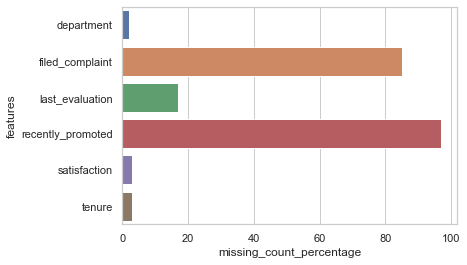

In [344]:
missing = df_Final_Data.isnull().sum()[df_Final_Data.isnull().sum() !=0]
missing = pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing['missing_count_percentage'] = ((missing['missing_count'])/df_DataForPred.shape[0])*100
plt.figure()
sns.barplot(y = missing['features'], x = missing['missing_count_percentage'])

In [345]:
df_Final_Data['department'].unique()

array(['D00-IT', 'D00-PD', 'D00-SS', 'D00-PR', 'D00-FN', 'D00-MT',
       'D00-MN', 'D00-ENG', 'D00-SP', 'D00-TP', nan, 'D00-AD'],
      dtype=object)

In [346]:
df_Final_Data.department.value_counts()

D00-SS     27
D00-ENG    17
D00-SP     13
D00-IT     11
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
D00-PR      1
D00-AD      1
Name: department, dtype: int64

In [347]:
# fill the missing values with dept_name : D00-SS.i.e. the Sales department as most of the employees are from this department
df_Final_Data['department'].fillna('D00-SS',inplace=True)

In [348]:
# filed_complaint has to change its values frm Nan to '0' as it is important feature in deciding predictions
df_Final_Data['filed_complaint'] = df_Final_Data['filed_complaint'].replace(np.nan, 0)

In [349]:
df_Final_Data['recently_promoted'] = df_Final_Data['recently_promoted'].replace(np.nan, 0)

In [350]:
df_ProdData = pd.merge(df_Final_Data, df_dept_data, how='left', left_on='department', right_on='dept_id')

In [351]:
df_ProdData.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,dept_id,dept_name,dept_head
0,134,D00-IT,0.0,0.528841,2,0.0,low,0.400464,3.0,119045,27,Male,Unmarried,D00-IT,IT,Henry Adey
1,221,D00-PD,0.0,0.784561,2,0.0,low,0.759513,3.0,112223,23,Male,Unmarried,D00-PD,Product,Darcy Staines
2,156,D00-SS,0.0,0.545183,2,0.0,medium,0.336457,3.0,103924,26,Male,Unmarried,D00-SS,Sales,Edward J Bayley
3,133,D00-PR,0.0,NaN,4,0.0,medium,0.832039,2.0,105922,52,Male,Married,D00-PR,Procurement,Louie Viles
4,135,D00-SS,0.0,0.454637,2,0.0,low,0.320723,5.0,103297,27,Male,Unmarried,D00-SS,Sales,Edward J Bayley


In [352]:
df_ProdData.shape

(100, 16)

In [353]:
df_ProdData.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_id',
       'dept_name', 'dept_head'],
      dtype='object')

In [354]:
df_ProdData.isnull().sum()[df_ProdData.isnull().sum() !=0]

last_evaluation    17
satisfaction        3
tenure              3
dtype: int64

<AxesSubplot:xlabel='missing_count_percentage', ylabel='features'>

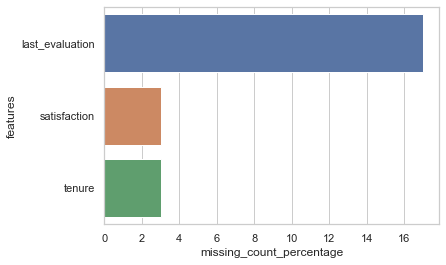

In [355]:
missing = df_ProdData.isnull().sum()[df_ProdData.isnull().sum() !=0]
missing = pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing['missing_count_percentage'] = ((missing['missing_count'])/df_finData.shape[0])*100
plt.figure()
sns.barplot(y = missing['features'], x = missing['missing_count_percentage'])

In [356]:
# Drop unnecessary fields
df_ProdData.drop(['department', 'dept_id', 'dept_head'], axis=1, inplace = True)

In [357]:
df_ProdData.isnull().sum()[df_finData.isnull().sum() !=0]

Series([], dtype: int64)

<AxesSubplot:xlabel='last_evaluation'>

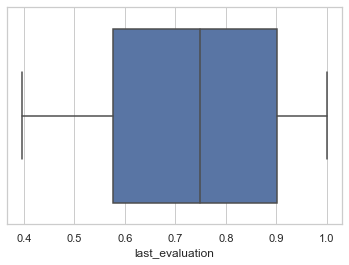

In [358]:
plt.plot(figsize=(15,10))
sns.boxplot(df_ProdData['last_evaluation'])

In [362]:
# last_evaluation has no outliers - Mean should do the job here
df_ProdData['last_evaluation'].fillna(df_ProdData['last_evaluation'].mean(),inplace=True)

In [363]:
# satisfaction has no outliers - Mean should do the job here
df_ProdData['satisfaction'].fillna(df_ProdData['satisfaction'].mean(),inplace=True)

In [364]:
# tenure has one outliers - Median should do the job here
df_ProdData['tenure'].fillna(df_ProdData['tenure'].median(),inplace=True)

In [365]:
df_ProdData.isnull().sum()[df_ProdData.isnull().sum() !=0]

Series([], dtype: int64)

In [366]:
# Encode the data to fit our model
le = LabelEncoder()
df_ProdData['gender'] = le.fit_transform(df_ProdData['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df_ProdData['marital_status'] = le.fit_transform(df_ProdData['marital_status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df_ProdData['salary'] = le.fit_transform(df_ProdData['salary'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df_ProdData['dept_name'] = le.fit_transform(df_ProdData['dept_name'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1}
{'Married': 0, 'Unmarried': 1}
{'high': 0, 'low': 1, 'medium': 2}
{'Admin': 0, 'Engineering': 1, 'Finance': 2, 'IT': 3, 'Management': 4, 'Marketing': 5, 'Procurement': 6, 'Product': 7, 'Sales': 8, 'Support': 9, 'Temp': 10}


In [367]:
df_ProdData.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'tenure', 'employee_id',
       'age', 'gender', 'marital_status', 'dept_name'],
      dtype='object')

In [371]:
X = df_ProdData.drop(columns = 'employee_id')

In [372]:
X.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'tenure', 'age',
       'gender', 'marital_status', 'dept_name'],
      dtype='object')

In [373]:
df.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'age', 'gender', 'marital_status', 'dept_name'],
      dtype='object')

In [374]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   filed_complaint    100 non-null    float64
 2   last_evaluation    100 non-null    float64
 3   n_projects         100 non-null    int64  
 4   recently_promoted  100 non-null    float64
 5   salary             100 non-null    int32  
 6   satisfaction       100 non-null    float64
 7   tenure             100 non-null    float64
 8   age                100 non-null    int64  
 9   gender             100 non-null    int32  
 10  marital_status     100 non-null    int32  
 11  dept_name          100 non-null    int32  
dtypes: float64(5), int32(4), int64(3)
memory usage: 8.6 KB


In [375]:
X.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,age,gender,marital_status,dept_name
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,198.810000,0.15000,0.744114,3.760000,0.030000,1.350000,0.629632,3.41000,33.310000,0.750000,0.490000,5.510000
std,53.185723,0.35887,0.154295,1.349298,0.171447,0.657129,0.243131,1.54459,9.795582,0.435194,0.502418,3.092823
min,68.000000,0.00000,0.396801,1.000000,0.000000,0.000000,0.051515,2.00000,22.000000,0.000000,0.000000,0.000000
25%,154.500000,0.00000,0.661656,3.000000,0.000000,1.000000,0.483160,2.00000,25.000000,0.750000,0.000000,3.000000
50%,206.000000,0.00000,0.744114,4.000000,0.000000,1.000000,0.645262,3.00000,29.000000,1.000000,0.000000,7.000000
75%,247.500000,0.00000,0.837033,5.000000,0.000000,2.000000,0.831477,4.00000,42.000000,1.000000,1.000000,8.000000
max,289.000000,1.00000,1.000000,7.000000,1.000000,2.000000,1.000000,10.00000,56.000000,1.000000,1.000000,10.000000


## b. Run the model through the given data

In [376]:
y_pred_unseenData = rfc_grid.predict(X)
y_pred_unseenData_probability = rfc_grid.predict_proba(X)
preds = y_pred_unseenData_probability[:,1]
print (y_pred_unseenData.shape, y_pred_unseenData_probability.shape, preds.shape)

(100,) (100, 2) (100,)


In [377]:
print(X_train.columns)
print(X.columns)

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'tenure', 'age',
       'gender', 'marital_status', 'dept_name'],
      dtype='object')
Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'tenure', 'age',
       'gender', 'marital_status', 'dept_name'],
      dtype='object')


In [378]:
y_pred_df = pd.DataFrame(y_pred_unseenData, columns=['status'])
y_pred_proba_df = pd.DataFrame(preds, columns=['Probability to Leave'])

In [379]:
print (y_pred_df.shape, y_pred_proba_df.shape)

(100, 1) (100, 1)


In [380]:
print (y_pred_df.columns, y_pred_proba_df.columns)

Index(['status'], dtype='object') Index(['Probability to Leave'], dtype='object')


In [381]:
decimals = 2    
y_pred_proba_df['Probability to Leave'] = y_pred_proba_df['Probability to Leave'].apply(lambda x: round(x, decimals))

In [382]:
y_pred_df.status.value_counts()

0    72
1    28
Name: status, dtype: int64

## c. Publishing the results

In [383]:
empColumn = df_finData[['employee_id']]
empColumn.shape

(100, 1)

In [384]:
df_final_publish = pd.concat([empColumn, y_pred_proba_df], axis=1)

In [385]:
df_final_publish.columns

Index(['employee_id', 'Probability to Leave'], dtype='object')

In [386]:
df_final_publish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           100 non-null    int64  
 1   Probability to Leave  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [387]:
df_final_publish.describe()

,employee_id,Probability to Leave
count,100.000000,100.00000
mean,112515.750000,0.27270
std,9466.676715,0.38729
min,100230.000000,0.00000
25%,105855.000000,0.01000
50%,110557.000000,0.03500
75%,117130.250000,0.62000
max,145105.000000,1.00000


In [388]:
df_final_publish.head()

,employee_id,Probability to Leave
0,119045,1.00
1,112223,0.07
2,103924,0.99
3,105922,0.00
4,103297,0.44


In [389]:
df_final_publish.to_csv('1012_HR_ProbData.csv', header=False, index=False)

> Sheet would have employees with high probability of leaving

